In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline
import warnings

In [2]:
con_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dt_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
new_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-15-2023.csv')

In [3]:
new_data.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2023-01-16 04:21:05  33.93911   
1   NaN    NaN            NaN        Albania  2023-01-16 04:21:05  41.15330   
2   NaN    NaN            NaN        Algeria  2023-01-16 04:21:05  28.03390   
3   NaN    NaN            NaN        Andorra  2023-01-16 04:21:05  42.50630   
4   NaN    NaN            NaN         Angola  2023-01-16 04:21:05 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953     207900    7854        NaN     NaN  Afghanistan   
1  20.168300     334037    3596        NaN     NaN      Albania   
2   1.659600     271287    6881        NaN     NaN      Algeria   
3   1.521800      47781     165        NaN     NaN      Andorra   
4  17.873900     105095    1930        NaN     NaN       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     534.058207             3.777778  
1   11607.373688             1.076527  
2     618.655752             2.536428  
3   61840.419336             0.345326  
4     319.765542             1.836434

In [4]:
con_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  
4  105277  105277  105277  105277  105288  105288  

[5 rows x 1147 columns]

In [5]:
dt_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896    7896    7896  
1    3598    3598    3598    3598    3598    3598  
2    6881    6881    6881    6881    6881    6881  
3     165     165     165     165     165     165  
4    1933    1933    1933    1933    1933    1933  

[5 rows x 1147 columns]

In [6]:
con_cols = con_df.keys()
dt_cols = dt_df.keys()

In [7]:
con_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [8]:
dt_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [9]:
con = con_df.loc[:, con_cols[4]:]
dt = dt_df.loc[:, dt_cols[4]:]

In [10]:
con

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0          0        0  ...   209322  209340  209358  209362  209369  209390   
1          0        0  ...   334391  334408  334408  334427  334427  334427   
2          0        0  ...   271441  271448  271463  271469  271469  271477   
3          0        0  ...    47866   47875   47875   47875   47875   47875   
4          0        0  ...   105255  105277  105277  105277  105277  105277   
..       ...      ...  ...      ...     ...     ...     ...     ...     ...   
284        0        0  ...   703228  703228  703228  703228  703228  703228   
285        0        0  ...      535     535     535     535     535     535   
286        0        0  ...    11945   11945   11945   11945   11945   11945   
287        0        0  ...   343012  343012  343079  343079  343079  343135   
288        0        0  ...   263921  264127  264127  264127  264127  264127   

     3/6/23  3/7/23  3/8/23  3/9/23  
0    209406  209436  209451  209451  
1    334427  334427  334443  334457  
2    271477  271490  271494  271496  
3     47875   47875   47890   47890  
4    105277  105277  105288  105288  
..      ...     ...     ...     ...  
284  703228  703228  703228  703228  
285     535     535     535     535  
286   11945   11945   11945   11945  
287  343135  343135  343135  343135  
288  264127  264127  264276  264276  

[289 rows x 1143 columns]

In [11]:
dt

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0          0        0  ...     7896    7896    7896    7896    7896    7896   
1          0        0  ...     3598    3598    3598    3598    3598    3598   
2          0        0  ...     6881    6881    6881    6881    6881    6881   
3          0        0  ...      165     165     165     165     165     165   
4          0        0  ...     1933    1933    1933    1933    1933    1933   
..       ...      ...  ...      ...     ...     ...     ...     ...     ...   
284        0        0  ...     5708    5708    5708    5708    5708    5708   
285        0        0  ...        0       0       0       0       0       0   
286        0        0  ...     2159    2159    2159    2159    2159    2159   
287        0        0  ...     4057    4057    4057    4057    4057    4057   
288        0        0  ...     5663    5668    5668    5668    5668    5668   

     3/6/23  3/7/23  3/8/23  3/9/23  
0      7896    7896    7896    7896  
1      3598    3598    3598    3598  
2      6881    6881    6881    6881  
3       165     165     165     165  
4      1933    1933    1933    1933  
..      ...     ...     ...     ...  
284    5708    5708    5708    5708  
285       0       0       0       0  
286    2159    2159    2159    2159  
287    4057    4057    4057    4057  
288    5668    5668    5671    5671  

[289 rows x 1143 columns]

In [12]:
num_dates = len(con.keys())
ck = con.keys()
dk = dt.keys()

world_cases = []
total_deaths = [] 
mortality_rate = []


for i in range(num_dates):
    con_sum = con[ck[i]].sum()
    dt_sum = dt[dk[i]].sum()
    
    world_cases.append(con_sum)
    total_deaths.append(dt_sum)
    
    # calculate rates
    mortality_rate.append(dt_sum/con_sum)

In [13]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [14]:
days_since_1_22 = np.array([i for i in range(len(ck))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [15]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(ck)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [16]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [17]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern), we are using data from 8/1/22 and onwards for the prediction modeling 
days_to_skip = 922
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.07, shuffle=False) 

In [18]:
# # use this to find the optimal parameters for SVR
#c = [0.01, 0.1, 1]
#gamma = [0.01, 0.1, 1]
#epsilon = [0.01, 0.1, 1]
#shrinking = [True, False]

#svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

#svm = SVR(kernel='poly', degree=3)
#svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
#svm_search.fit(X_train_confirmed, y_train_confirmed)

In [19]:
#svm_search.best_params_

In [20]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 14989630.117149115
MSE: 228559110492009.47


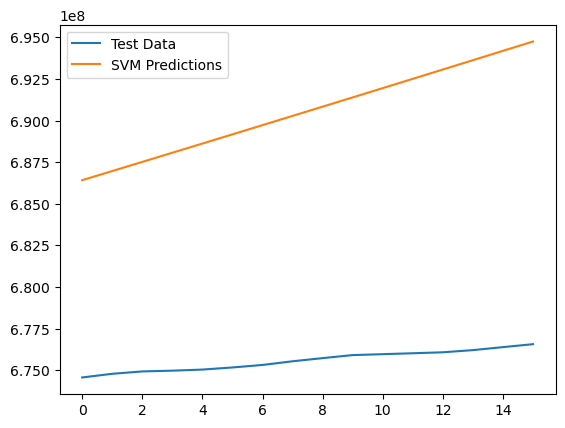

In [21]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [22]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [23]:
# polynomial regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
scaler = StandardScaler()
poly_X_train_confirmed_scaled = scaler.fit_transform(poly_X_train_confirmed)
poly_X_test_confirmed_scaled = scaler.transform(poly_X_test_confirmed)
poly_future_forcast_scaled = scaler.transform(poly_future_forcast)


# Initialize and fit the LinearRegression model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(poly_X_train_confirmed_scaled, y_train_confirmed)

# Make predictions
test_linear_pred = linear_model.predict(poly_X_test_confirmed_scaled)
linear_pred = linear_model.predict(poly_future_forcast_scaled)

# Evaluate the model
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 5510277.09202265
MSE: 31527634551142.266


In [24]:
print(linear_model.coef_)

[[ 0.00000000e+00  3.67965983e+08 -6.07205809e+08  2.66466740e+08]]


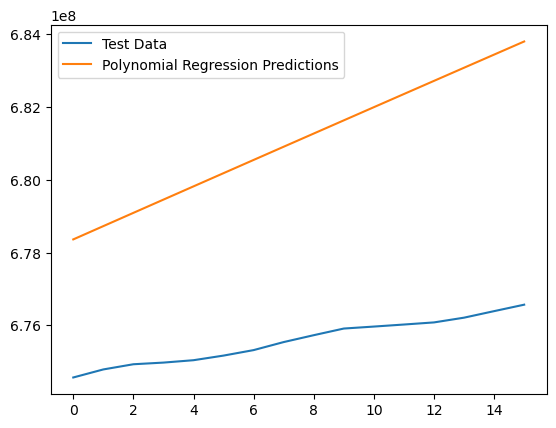

In [25]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

# Preprocess the data with StandardScaler for normalisation
scaler = StandardScaler()
bayesian_poly_X_train_confirmed_scaled = scaler.fit_transform(bayesian_poly_X_train_confirmed)
bayesian_poly_X_test_confirmed_scaled = scaler.transform(bayesian_poly_X_test_confirmed)

# Initialize BayesianRidge regression model
bayesian = BayesianRidge(fit_intercept=True)

# Perform Randomized Search with cross-validation
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed_scaled, y_train_confirmed)

# Make predictions (for example, on test data)
bayesian_pred = bayesian_search.best_estimator_.predict(bayesian_poly_X_test_confirmed_scaled)

# Optionally, evaluate the model
print('Best parameters found: ', bayesian_search.best_params_)
print('Mean Squared Error: ', mean_squared_error(y_test_confirmed, bayesian_pred))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters found:  {'tol': 0.01, 'lambda_2': 0.001, 'lambda_1': 1e-07, 'alpha_2': 1e-05, 'alpha_1': 1e-06}
Mean Squared Error:  20876162471962.2


C:\Users\Emmanuel Kusi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
bayesian_search.best_params_

{'tol': 0.01,
 'lambda_2': 0.001,
 'lambda_1': 1e-07,
 'alpha_2': 1e-05,
 'alpha_1': 1e-06}

In [28]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 5.237464733766185e+16
MSE: 2.743511233156848e+33


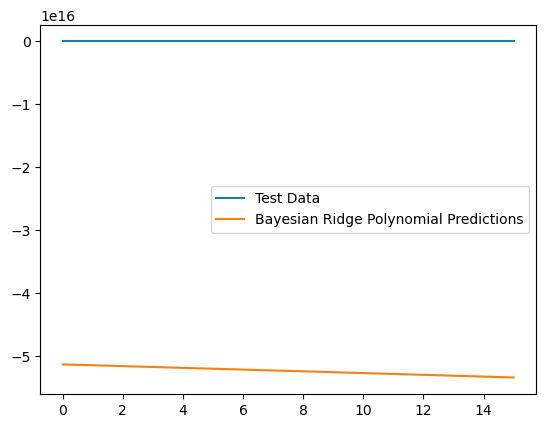

In [29]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [30]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

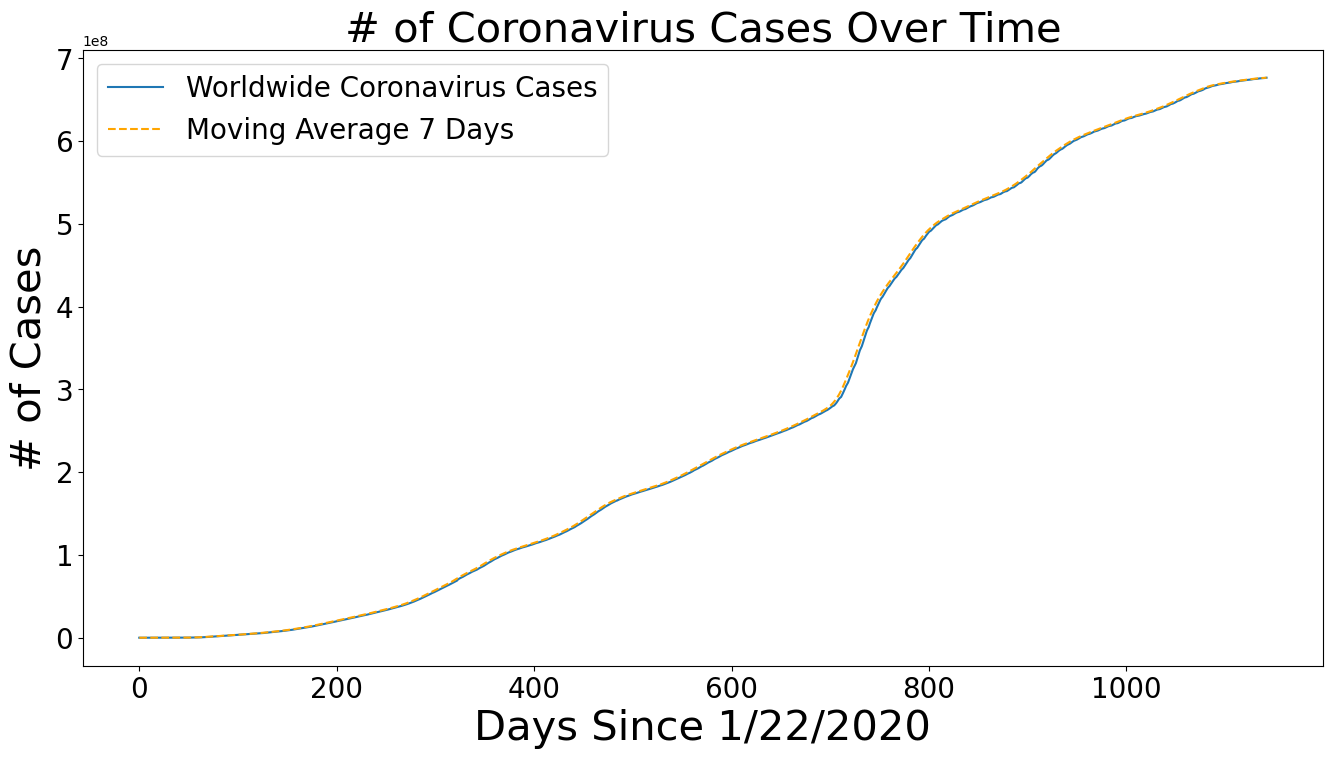

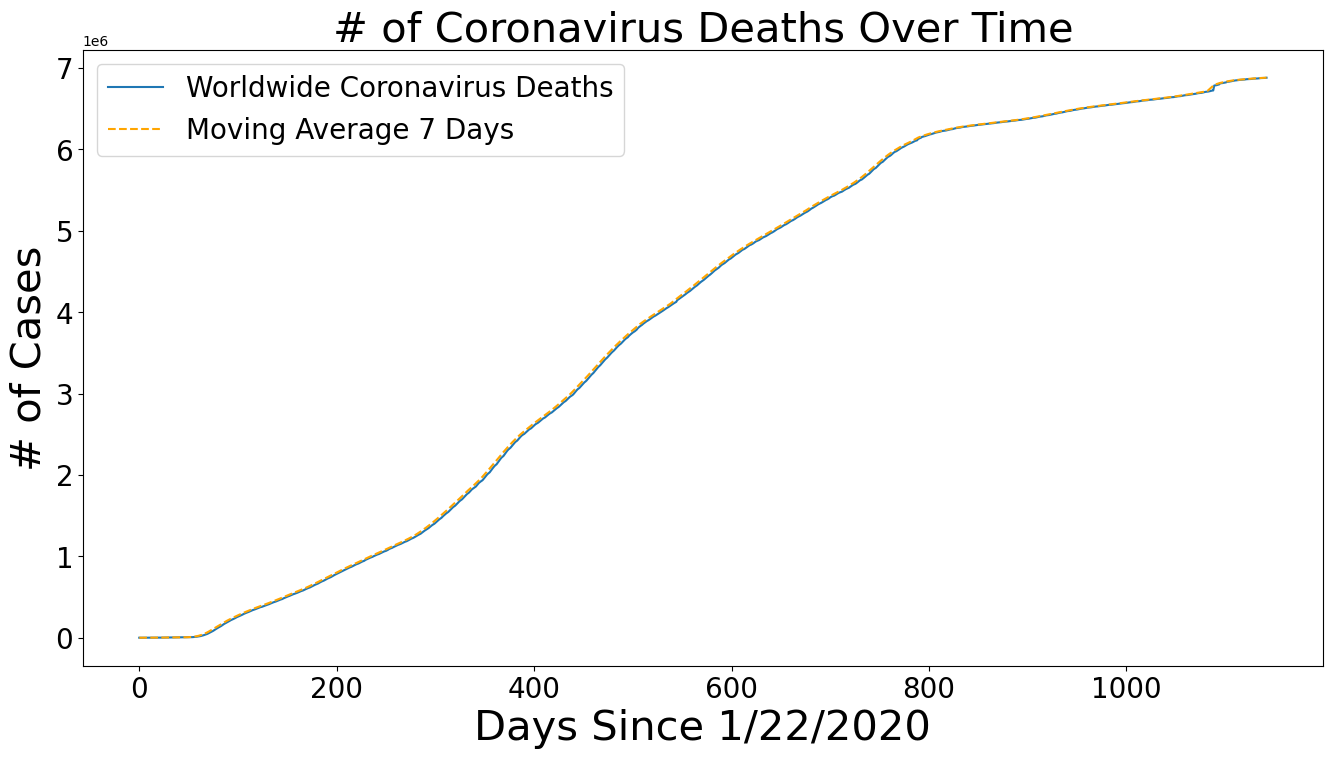

In [31]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

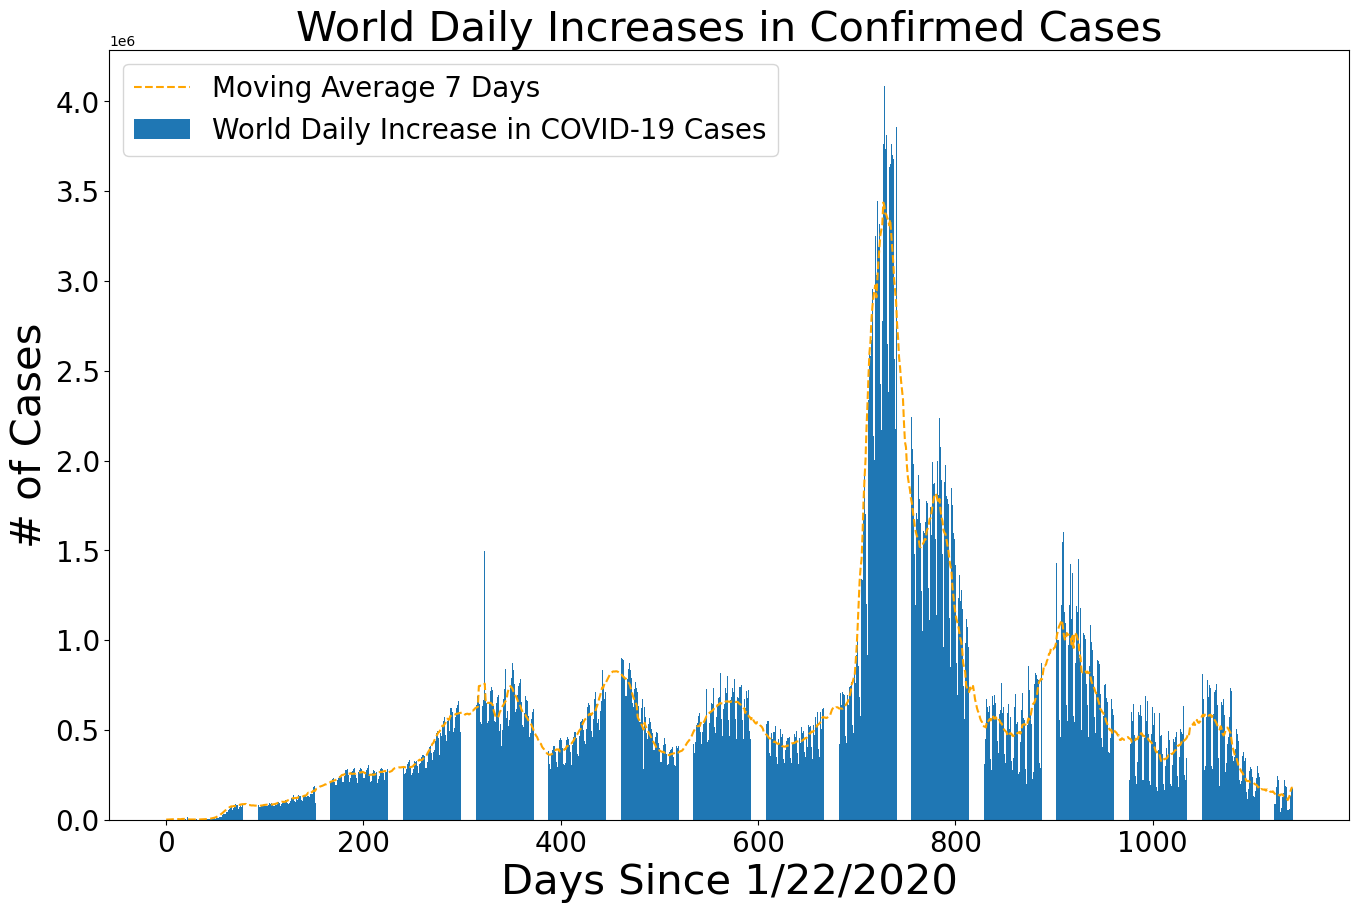

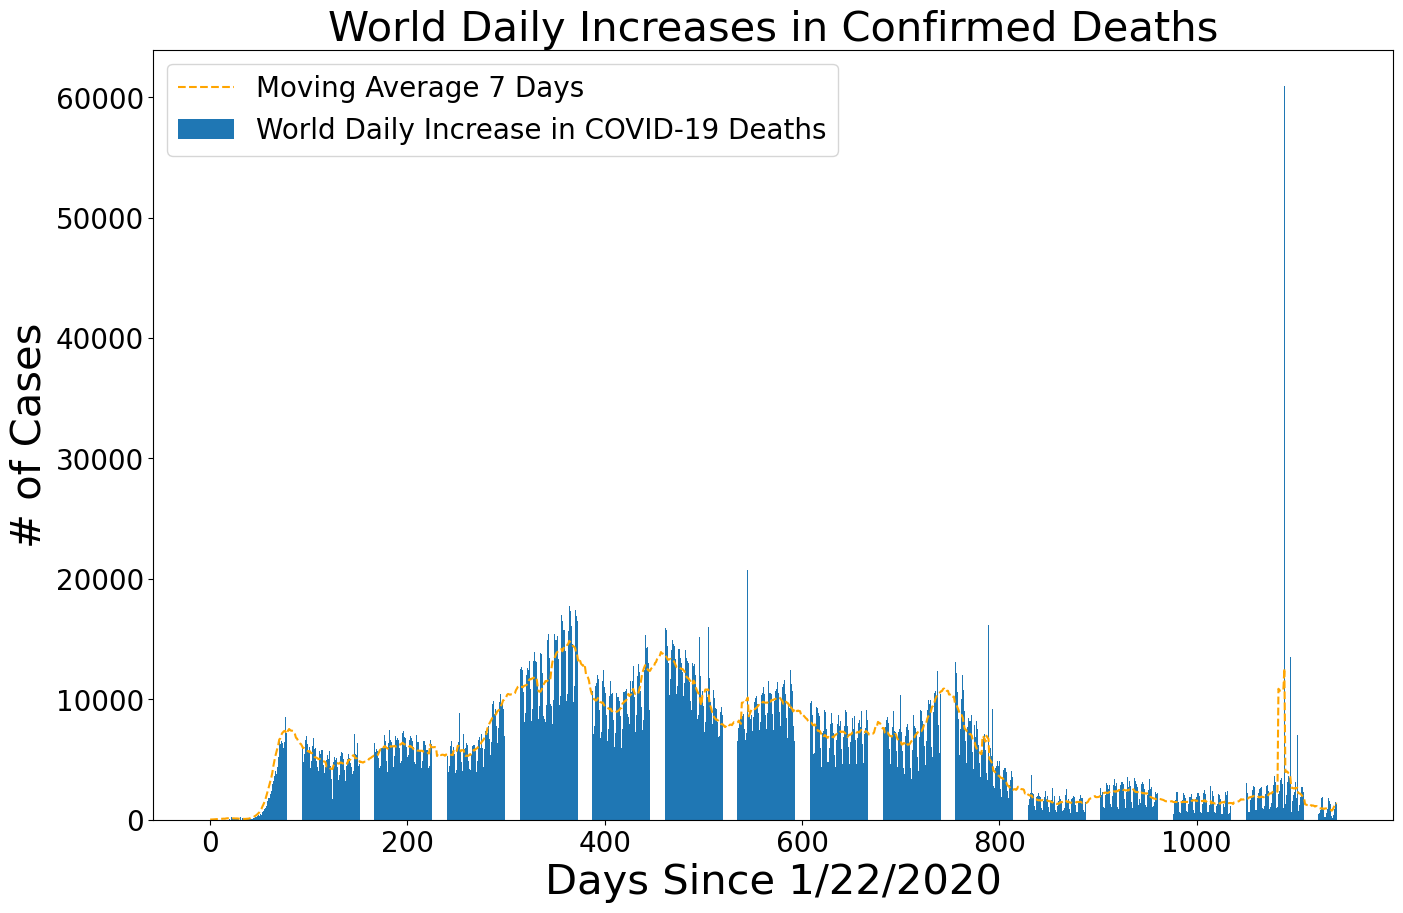

In [32]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

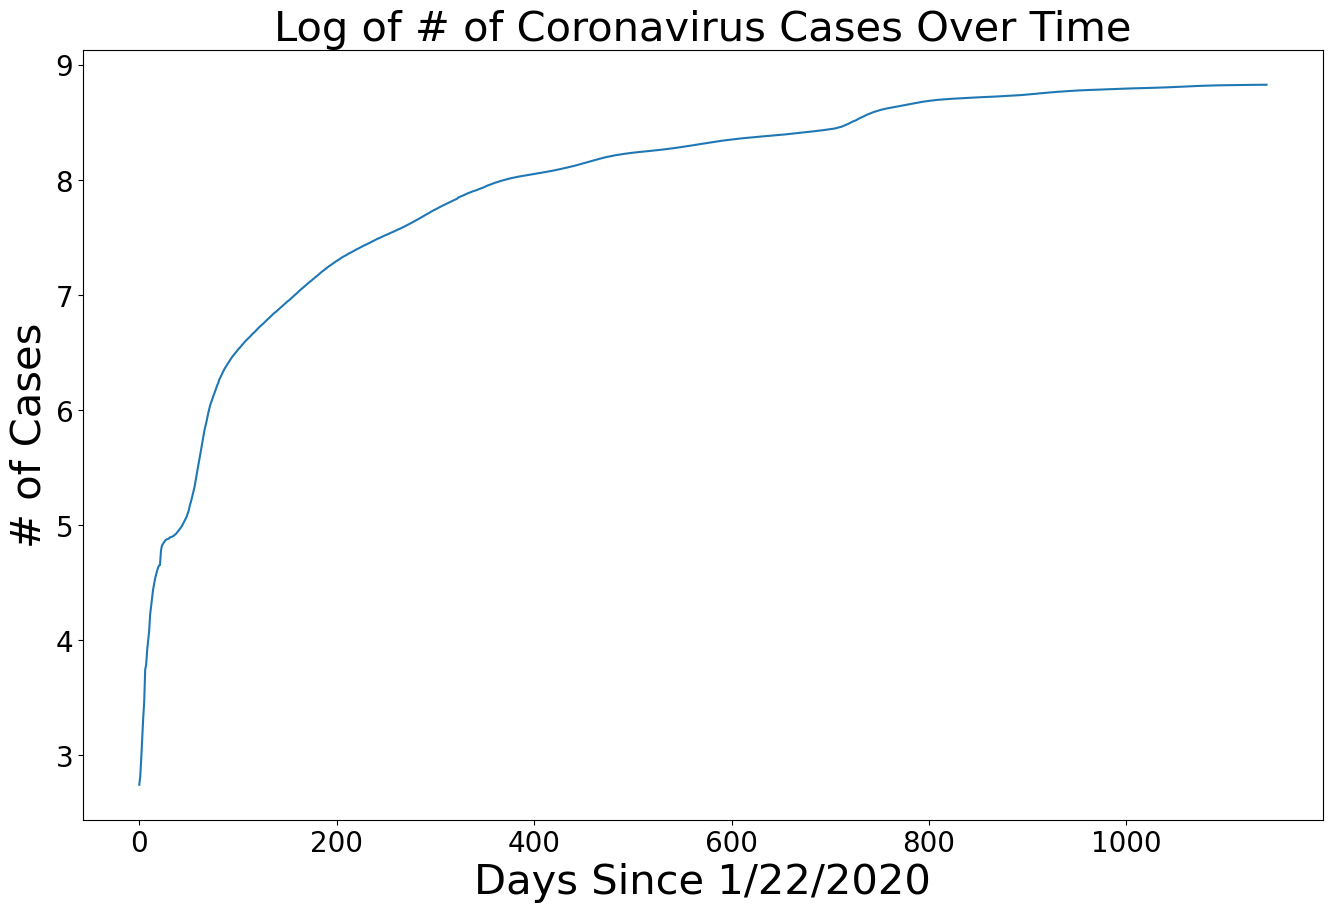

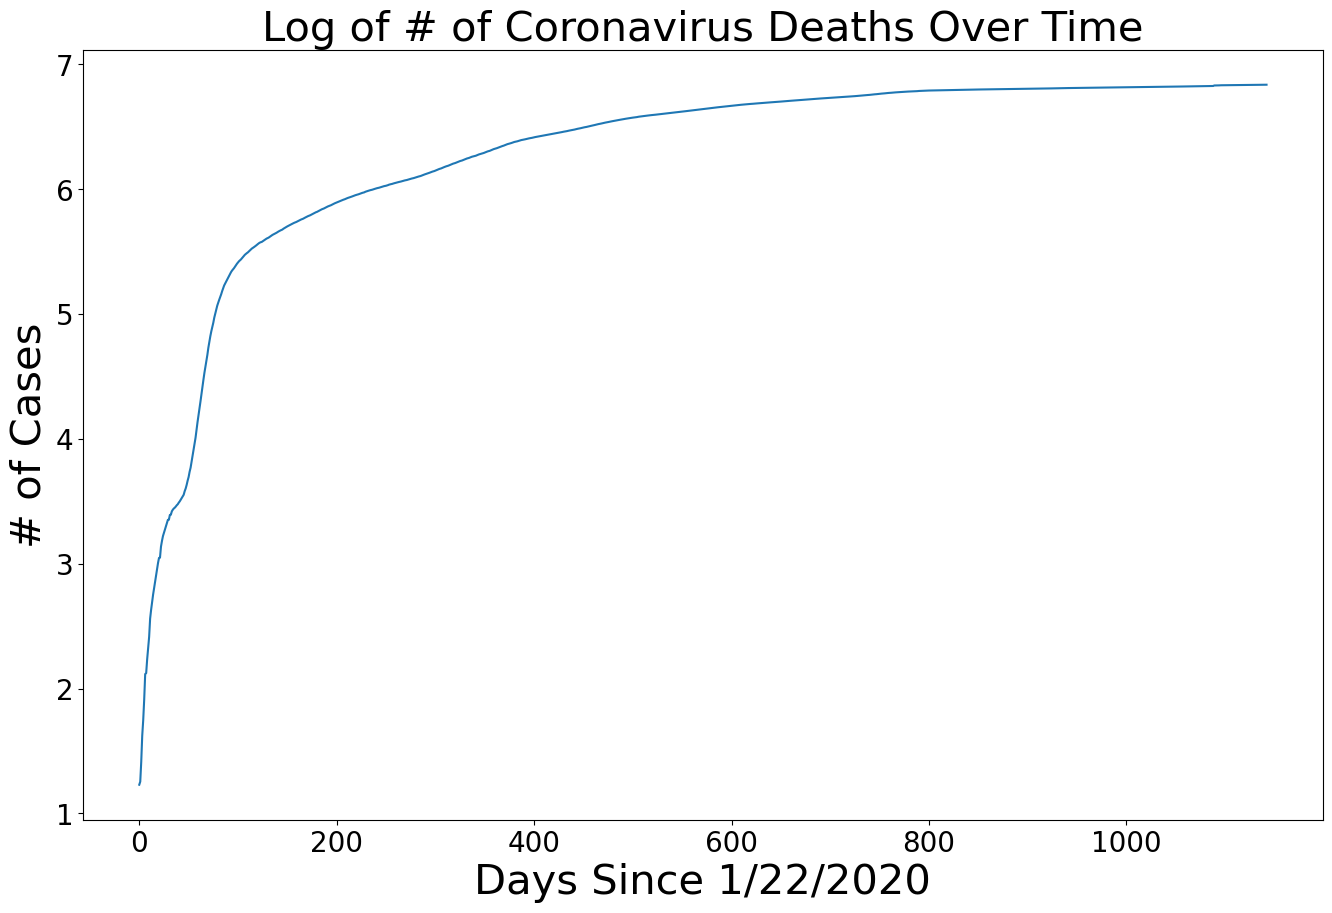

In [33]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [34]:
def country_plot(x, y1, y2, y3, country, window=14):
    # Calculate the moving averages
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    
    SIZE = (12, 8)
    
    # Plot for confirmed cases
    plt.figure(figsize=SIZE)
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    # Plot for daily increase in confirmed cases
    plt.figure(figsize=SIZE)
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    # Plot for daily increase in deaths
    plt.figure(figsize=SIZE)
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


# Helper function for getting a country's total covid cases and deaths    
def get_country_info(country_name, num_dates, confirmed_df, deaths_df, ck, dk):
    country_cases = []
    country_deaths = []
    
    # Loop through each date and get the data for the country
    for i in range(num_dates):
        country_cases.append(confirmed_df[confirmed_df['Country/Region'] == country_name][ck[i]].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region'] == country_name][dk[i]].sum())
    
    # Return both country cases and country deaths as a tuple
    return country_cases, country_deaths


# Country visualization function
def country_visualizations(country_name, adjusted_dates, num_dates, confirmed_df, deaths_df, ck, dk, window=14):
    # Get the country-specific case and death data
    country_info = get_country_info(country_name, num_dates, confirmed_df, deaths_df, ck, dk)
    country_cases = country_info[0]  # First element in the tuple is country_cases
    country_deaths = country_info[1]  # Second element is country_deaths
    
    # Calculate daily increases in cases and deaths
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    # Call the plot function to visualize the data
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name, window)


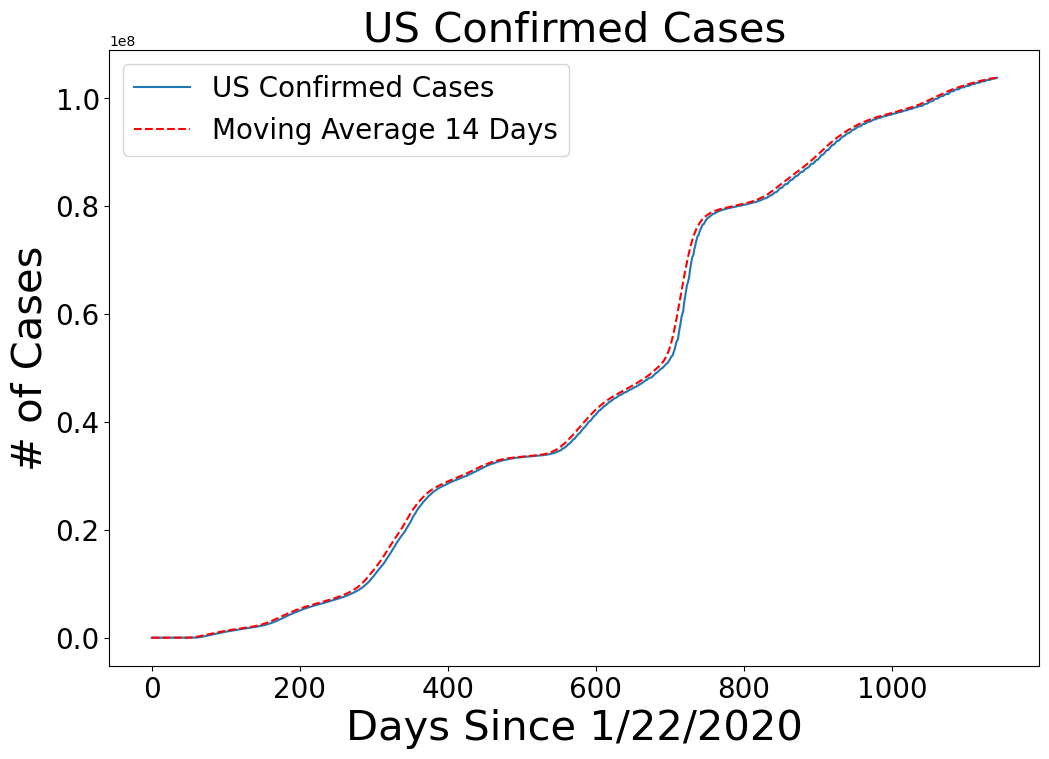

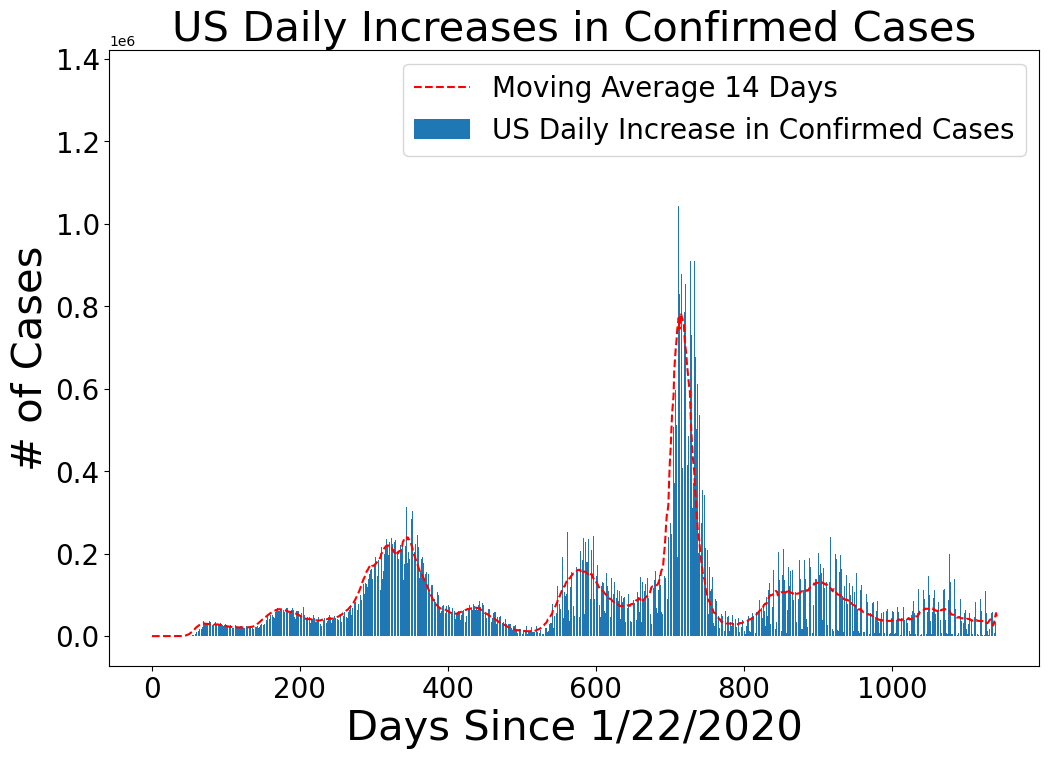

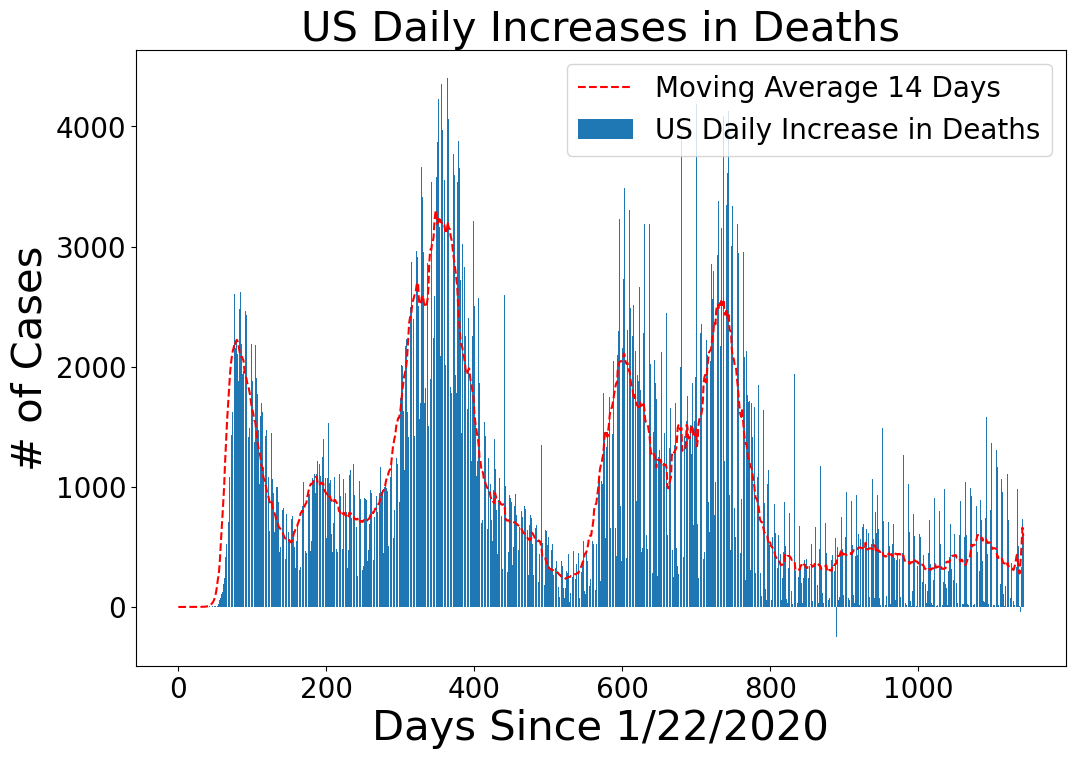

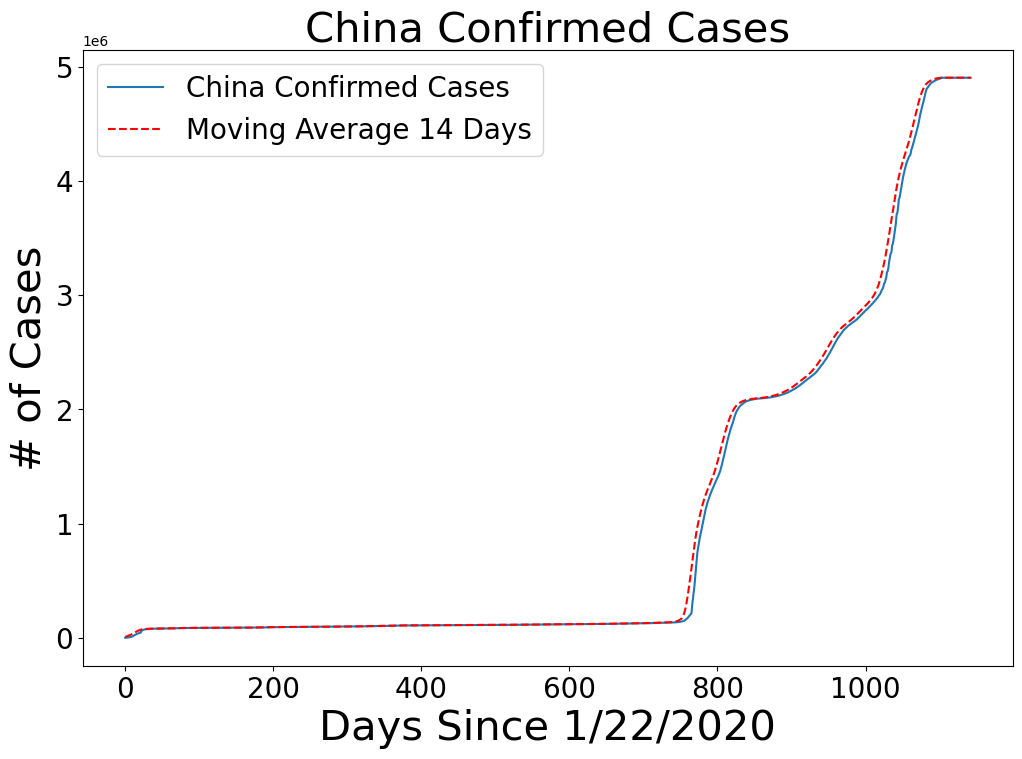

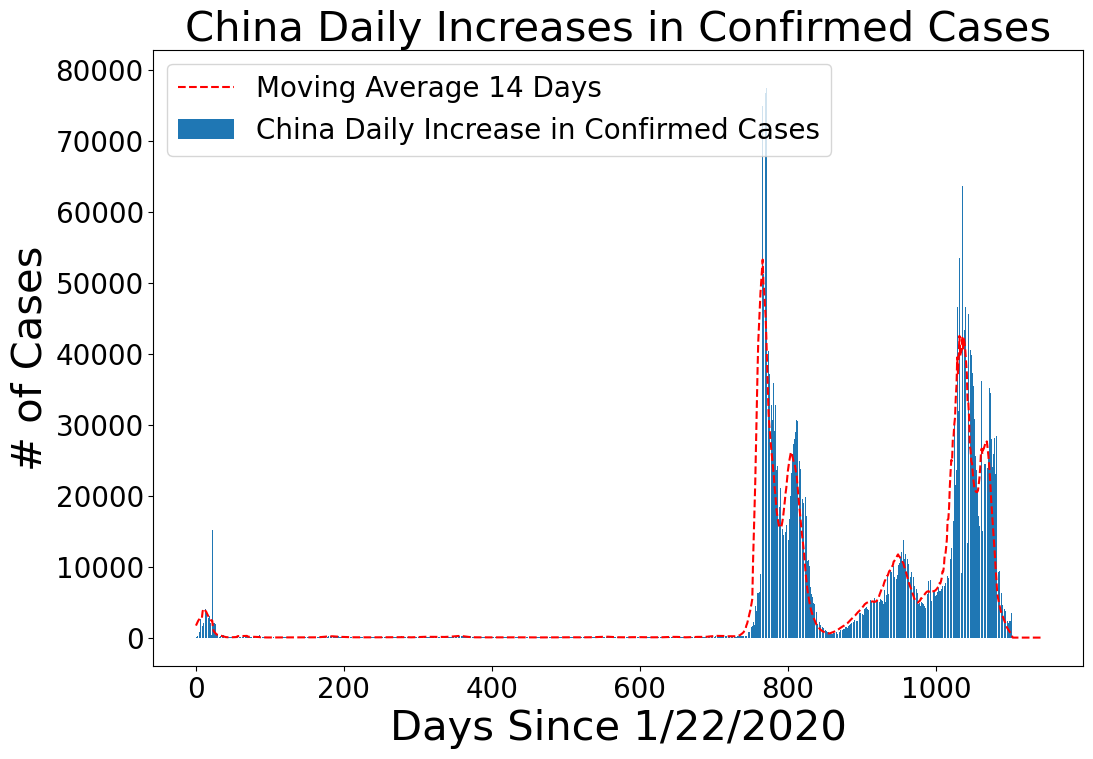

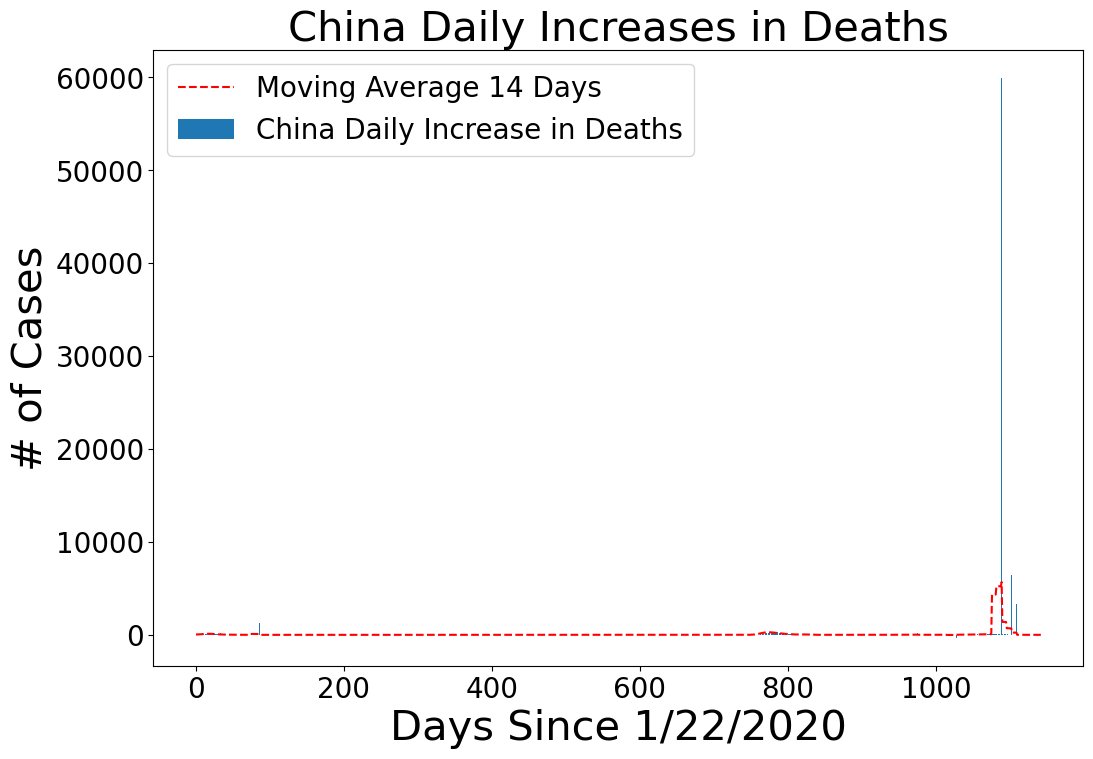

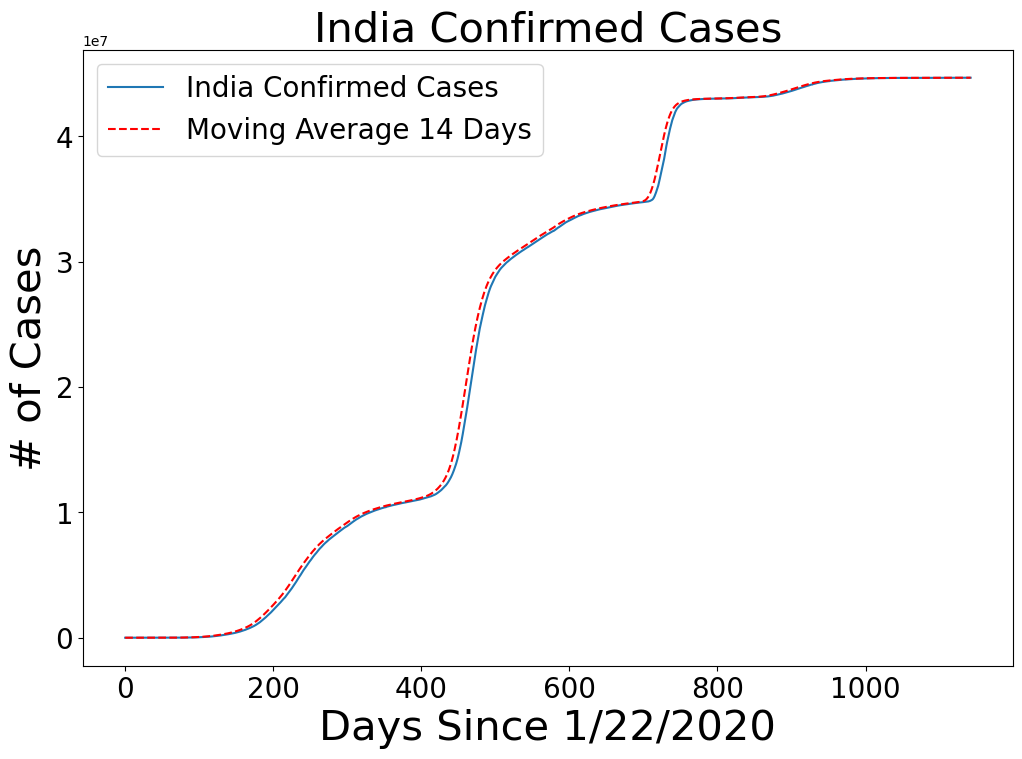

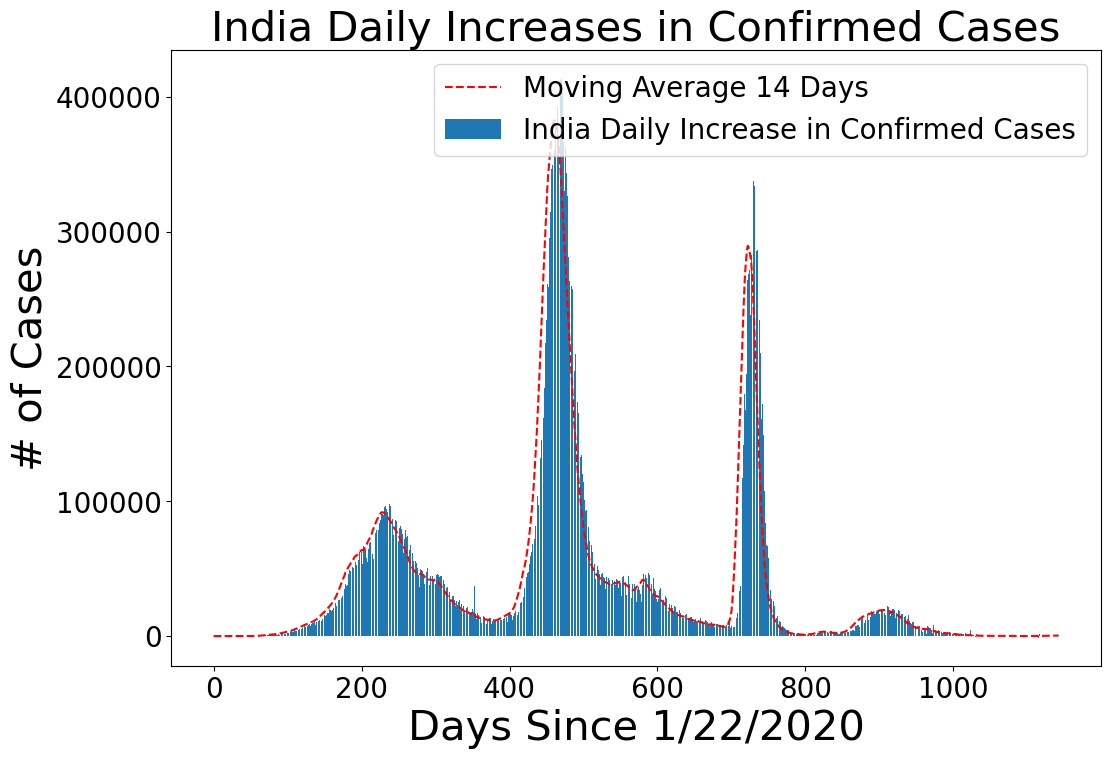

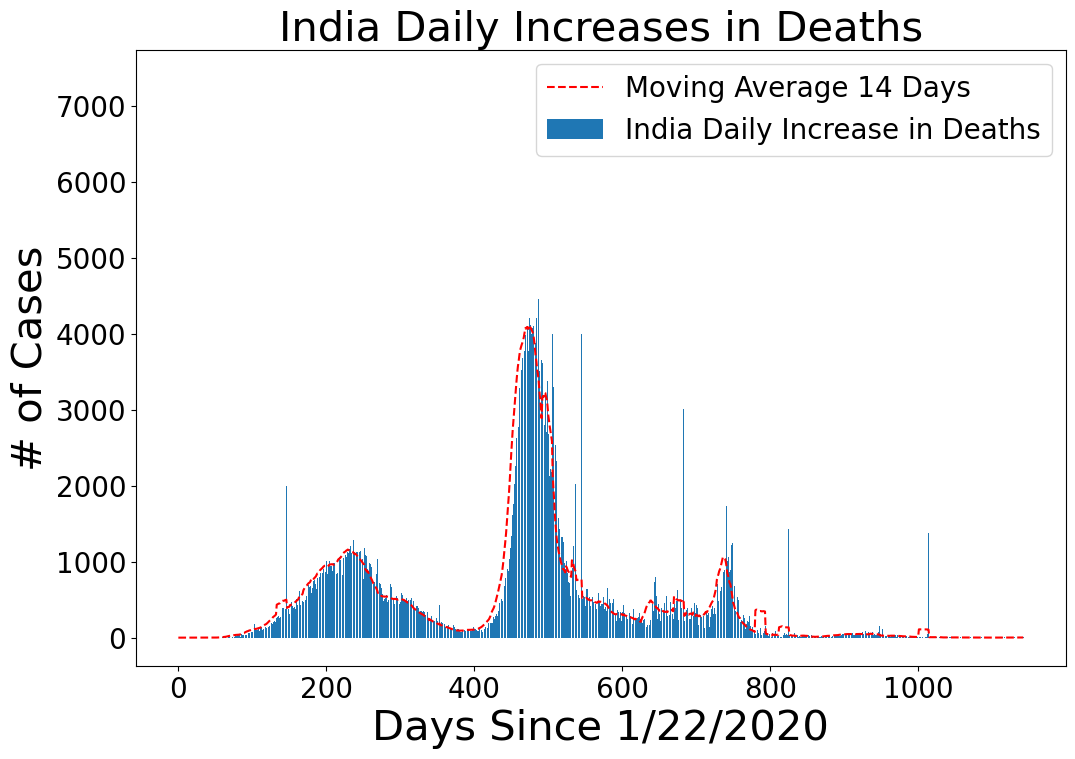

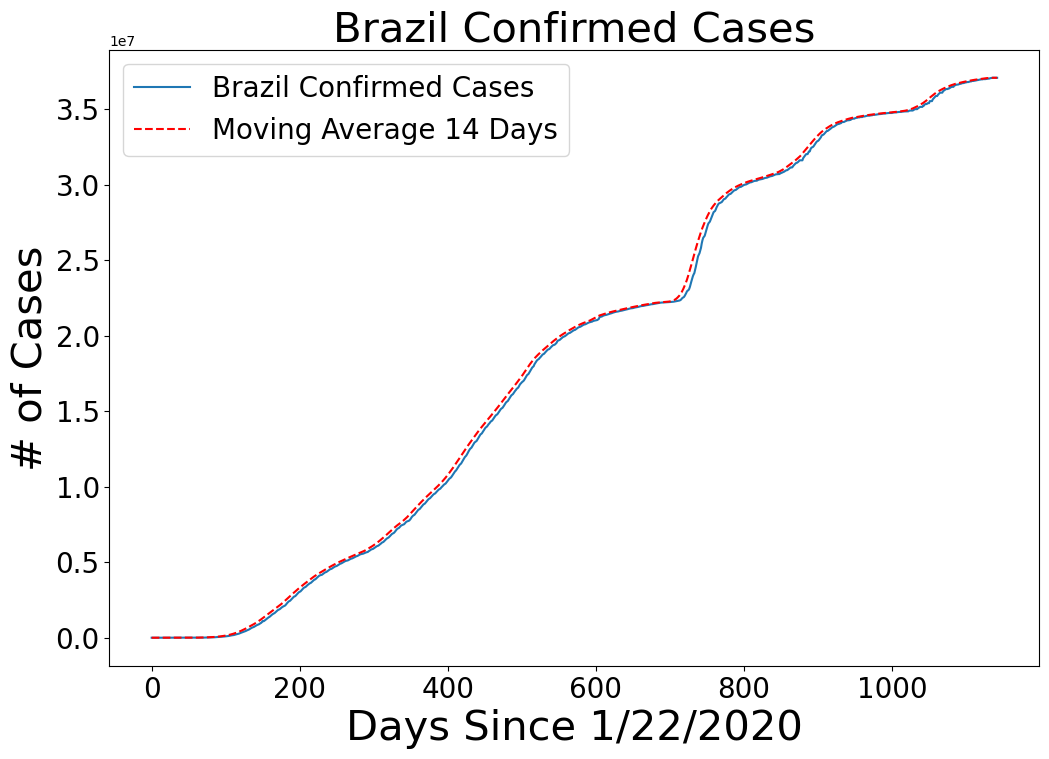

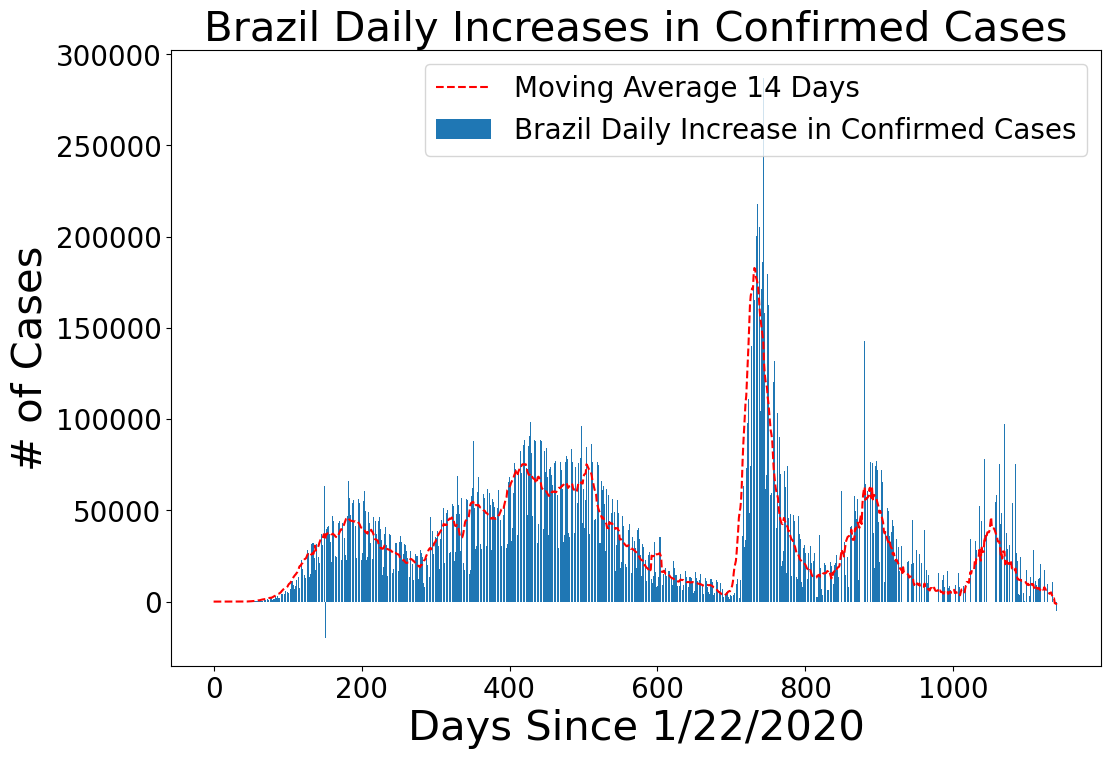

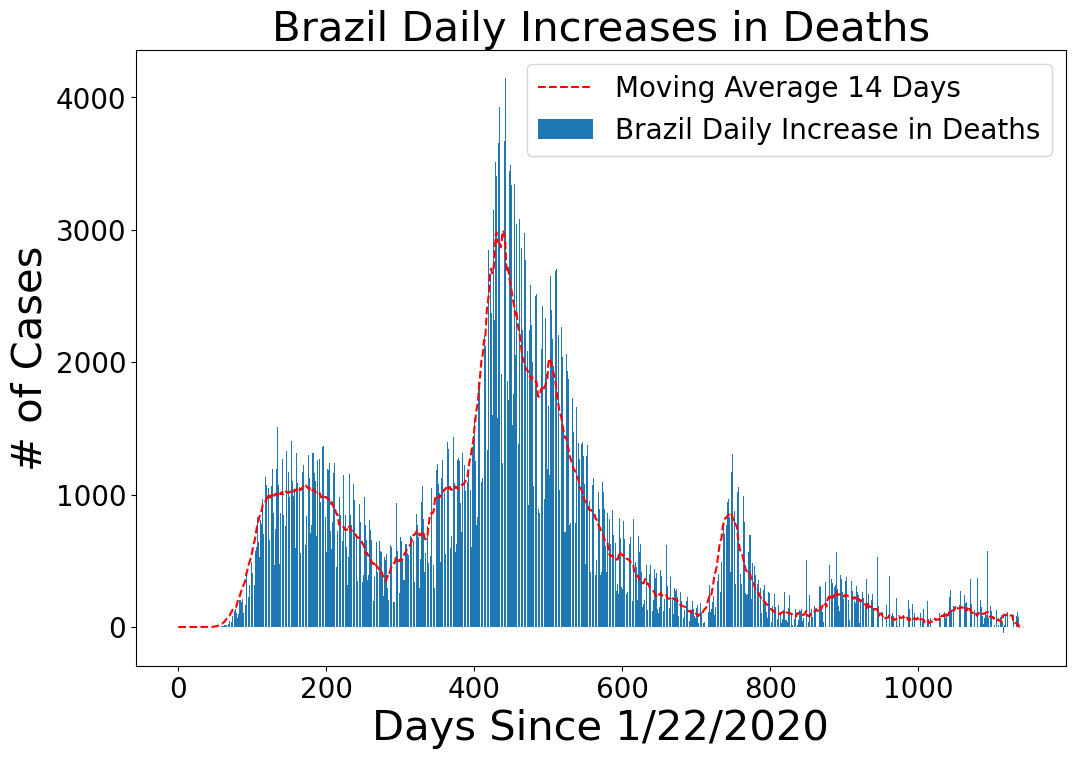

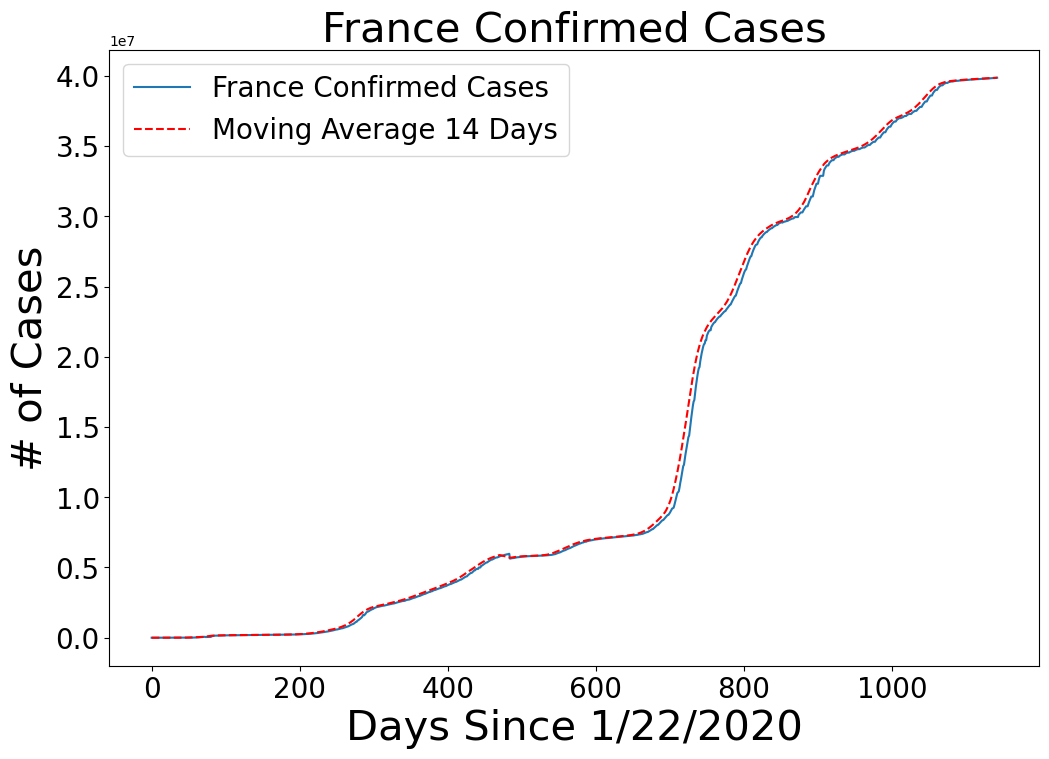

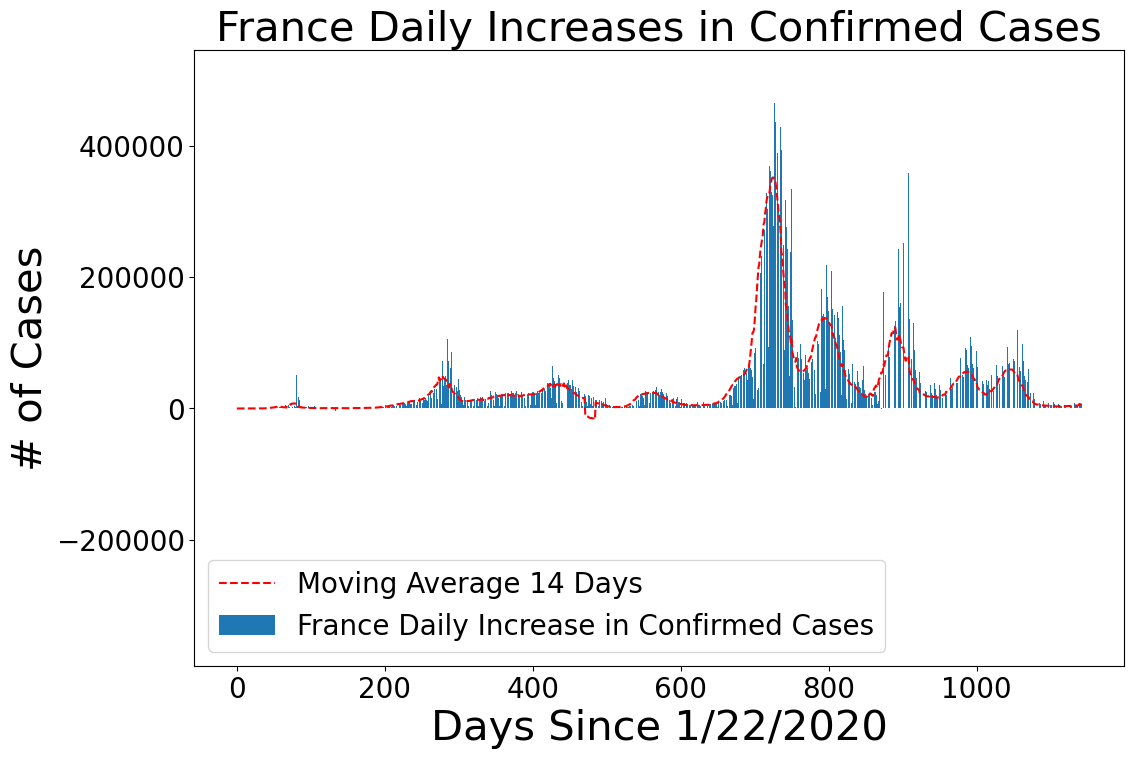

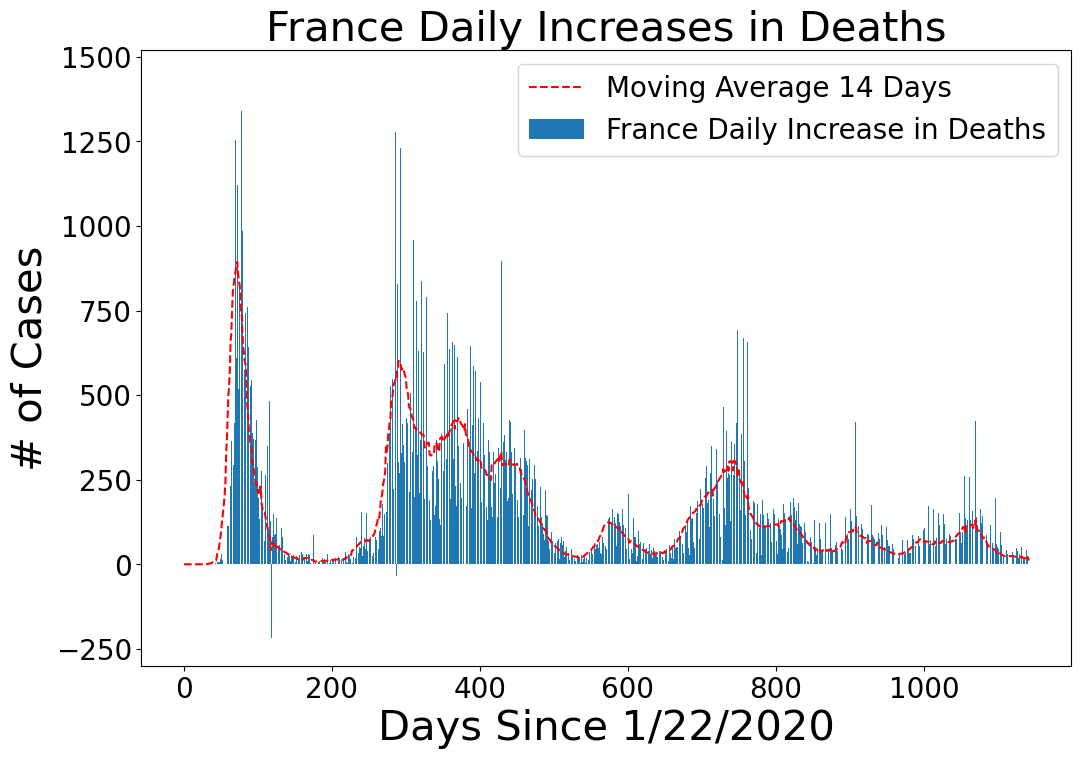

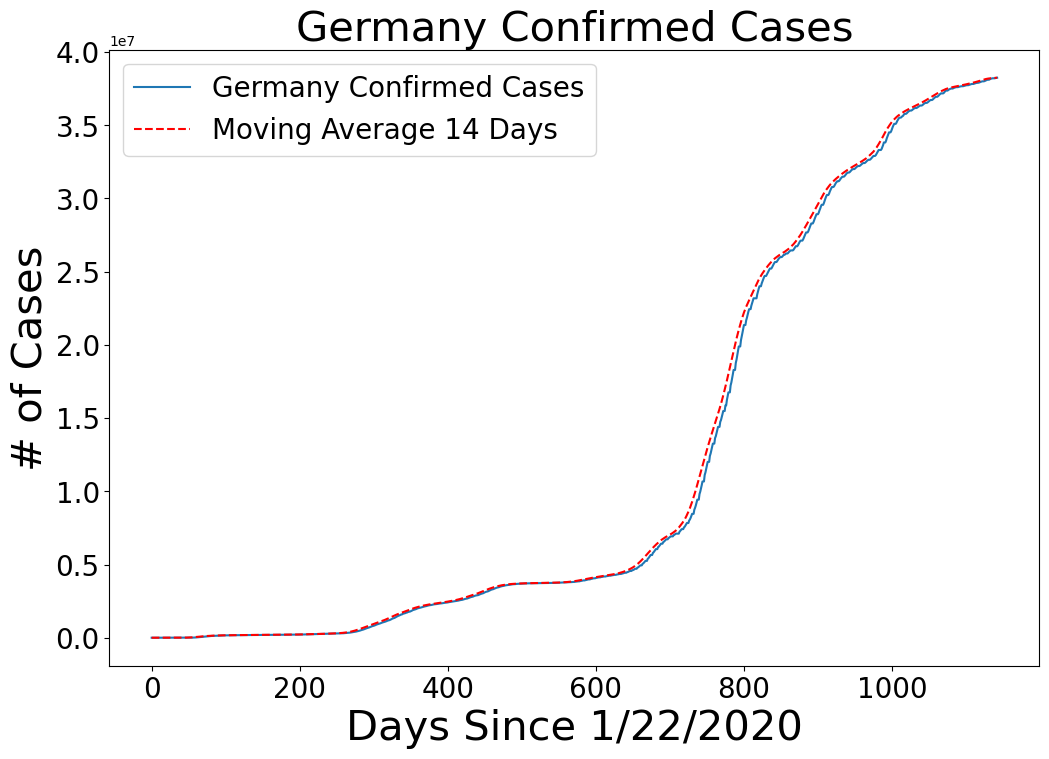

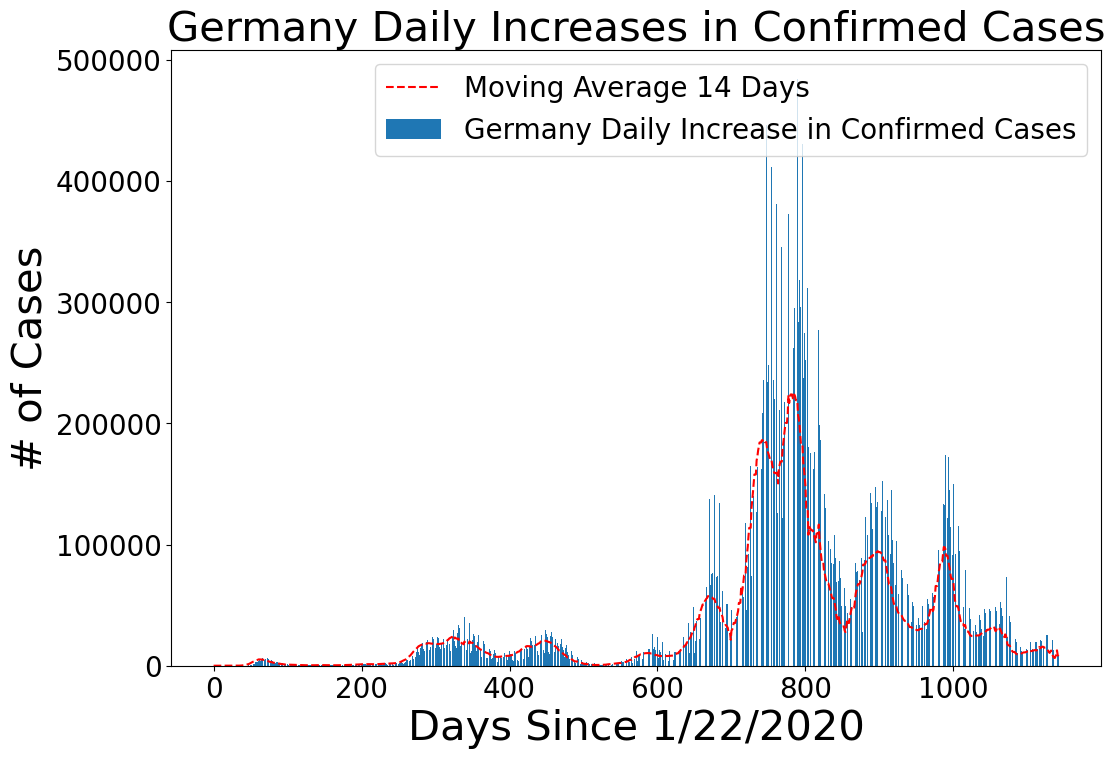

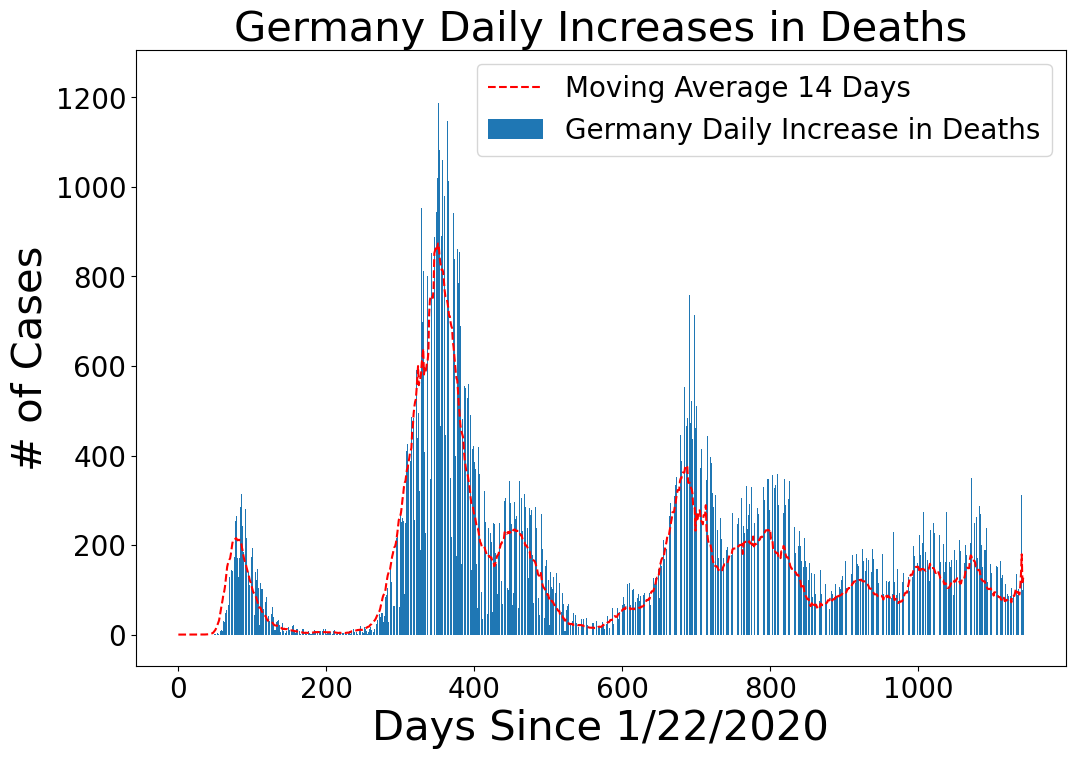

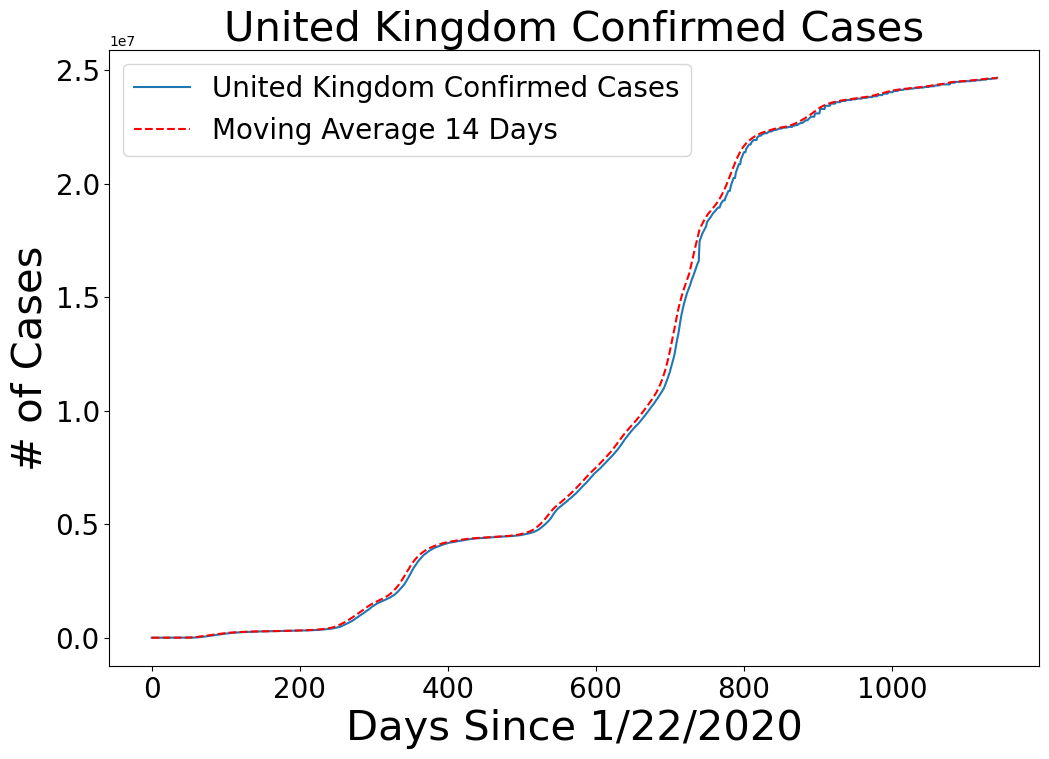

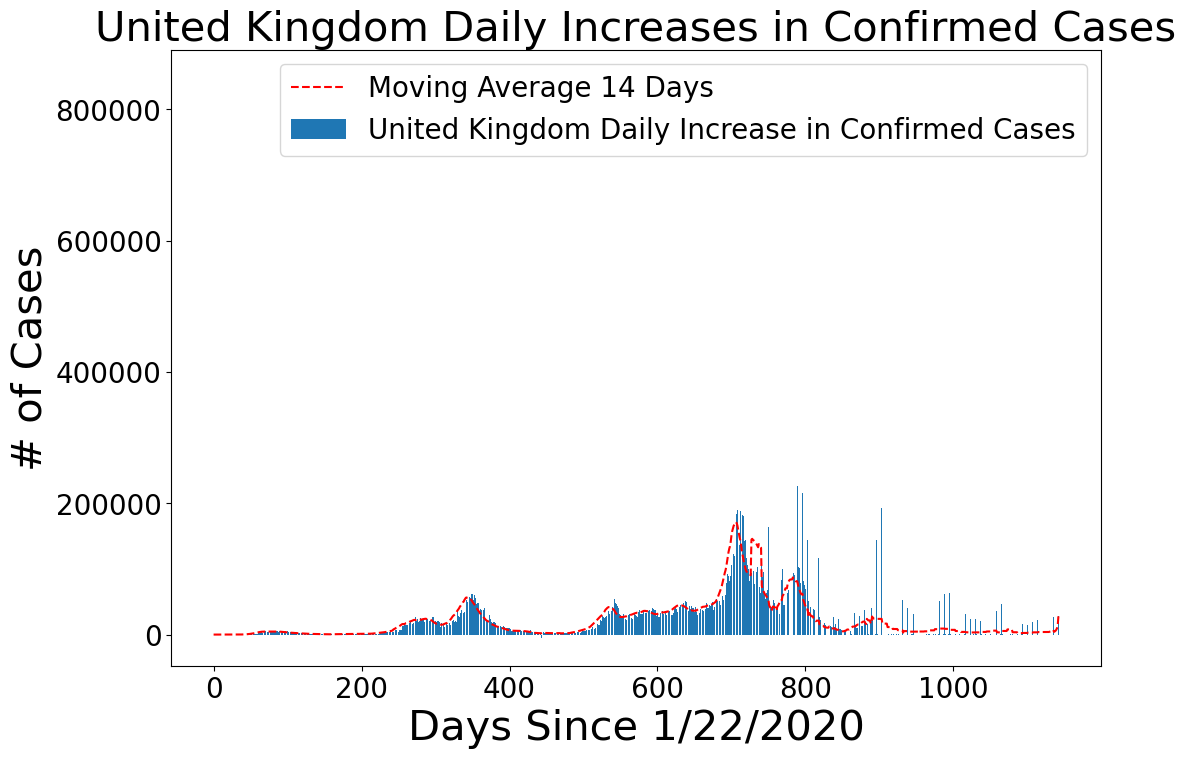

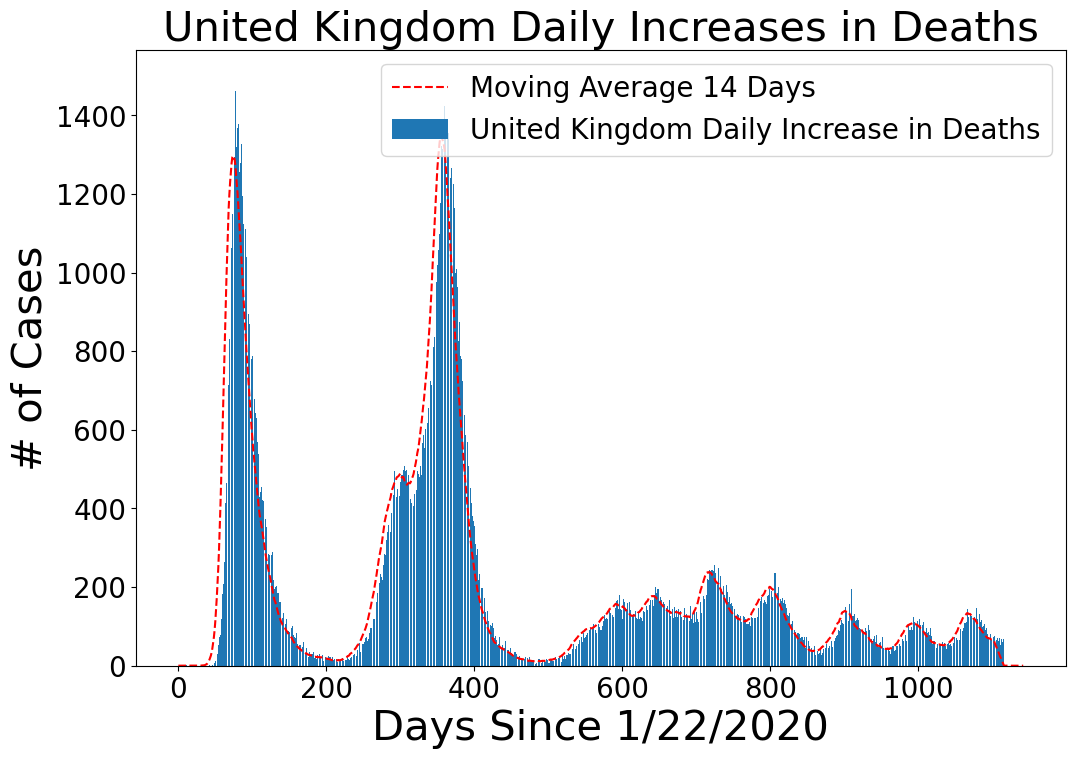

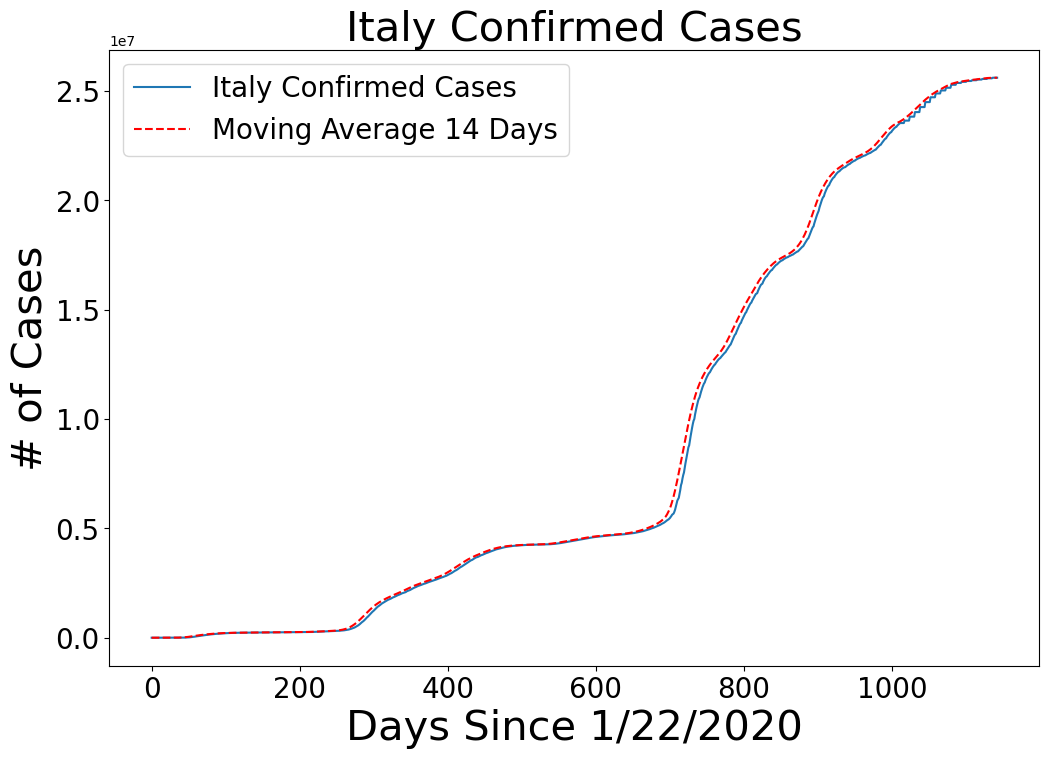

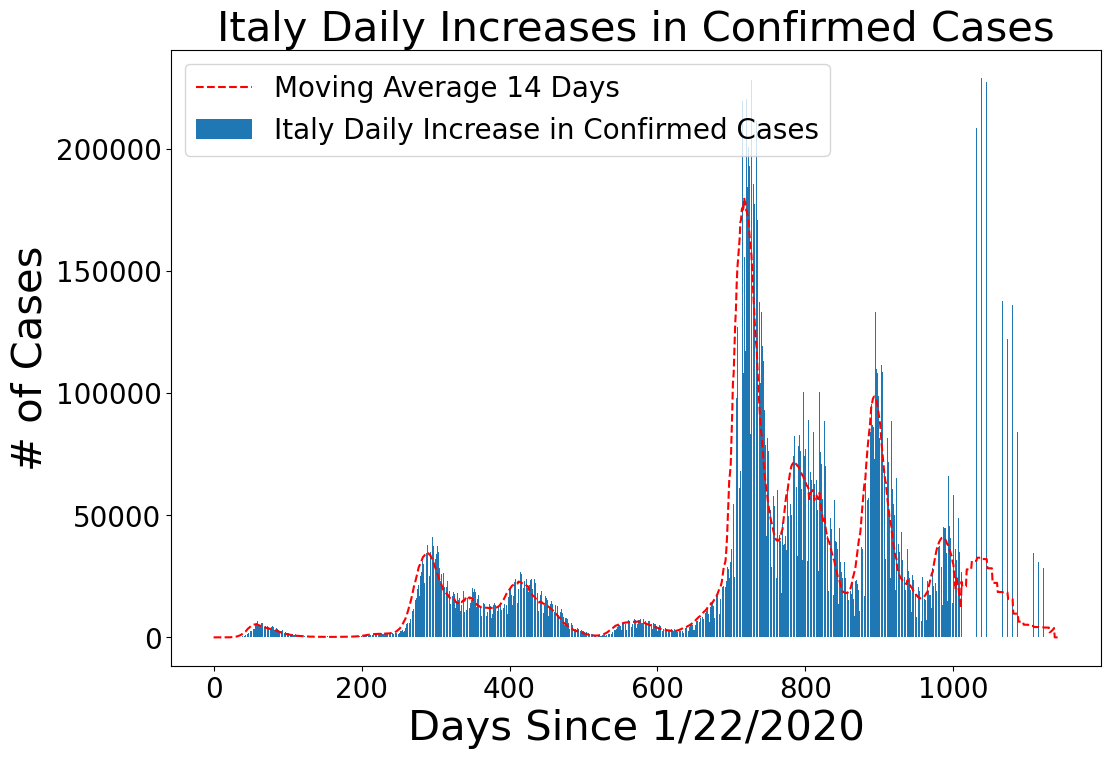

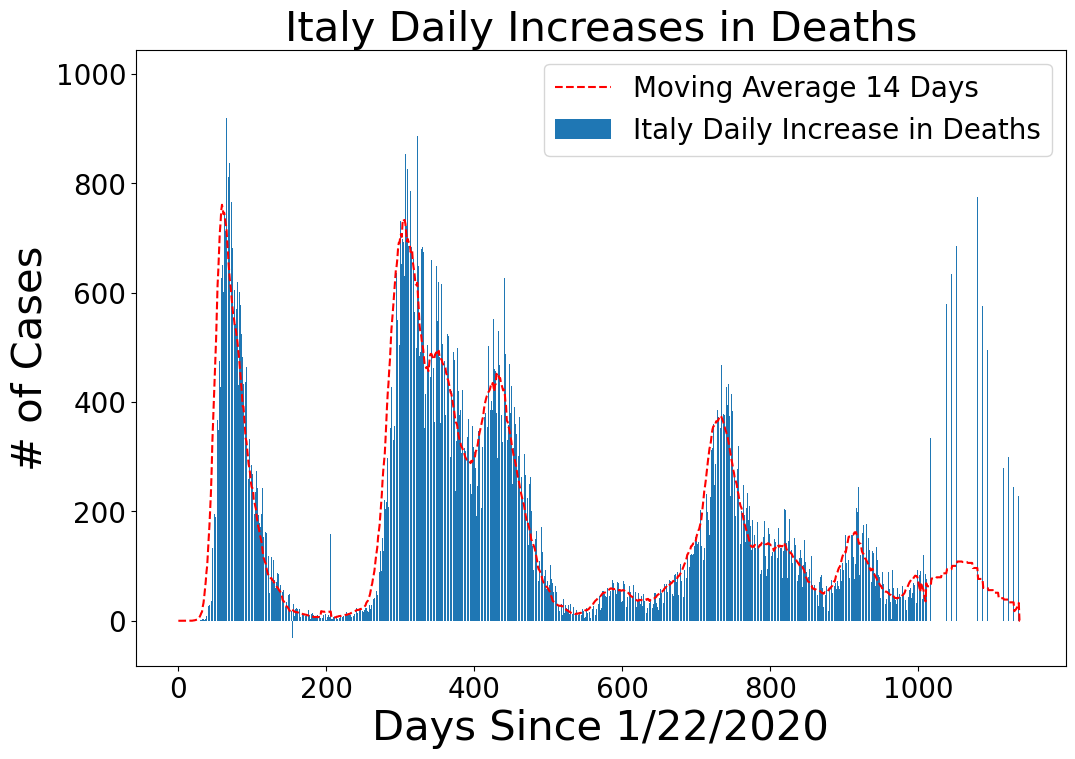

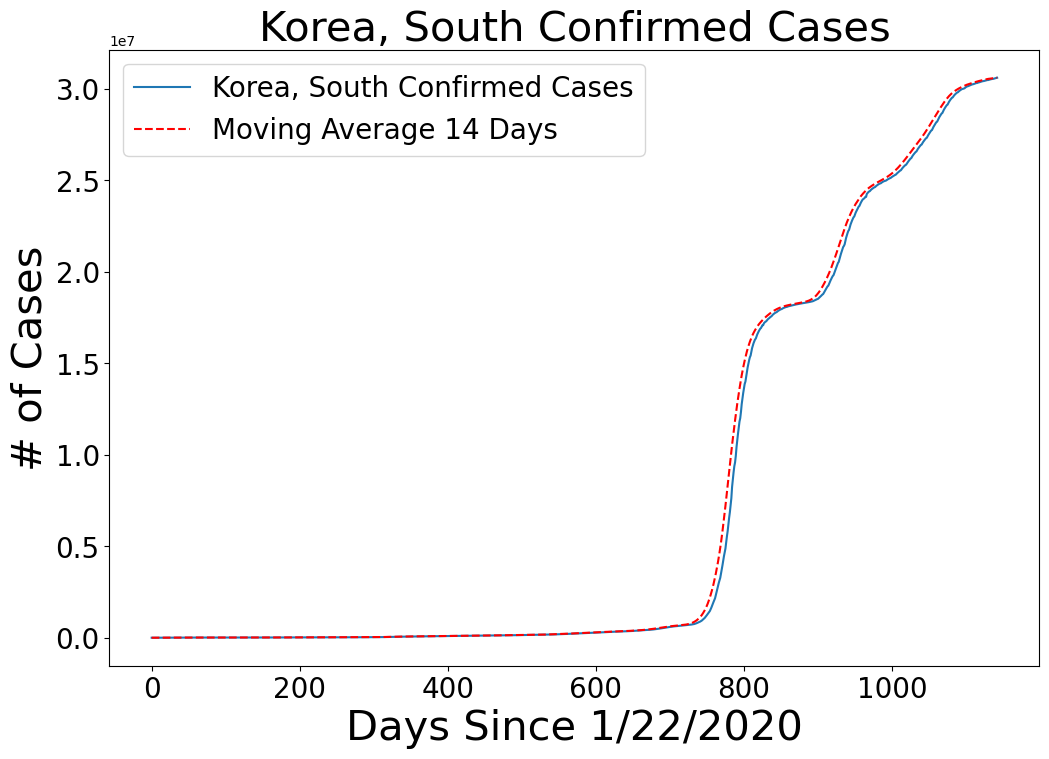

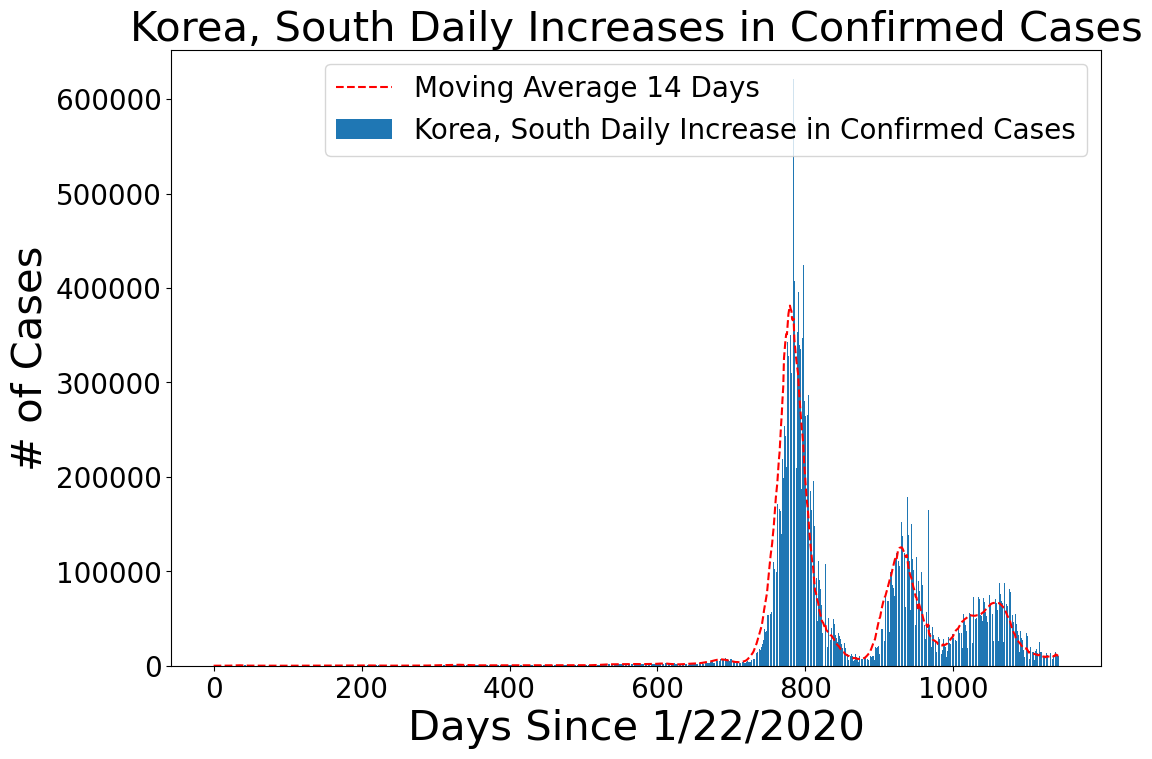

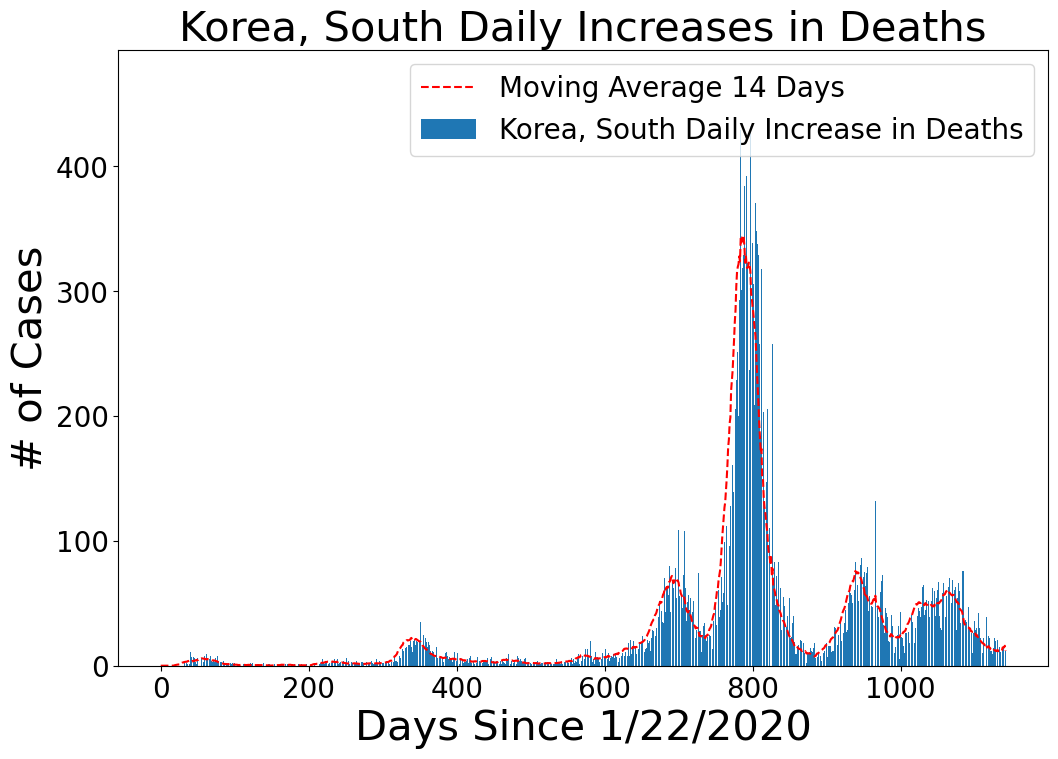

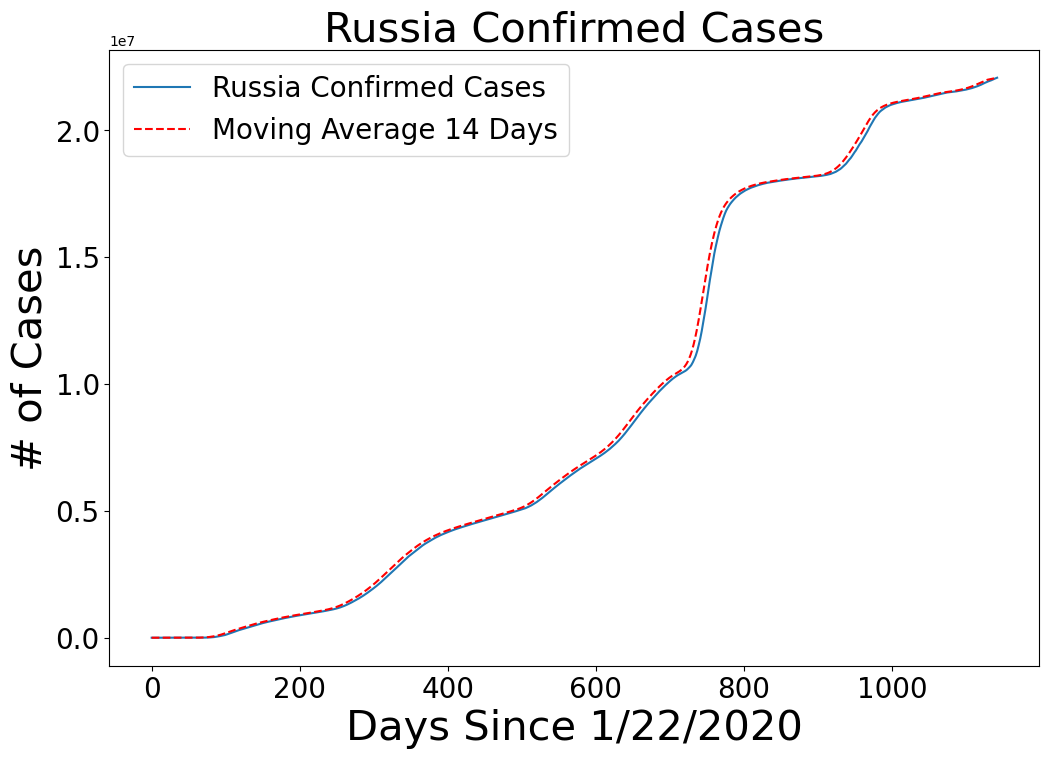

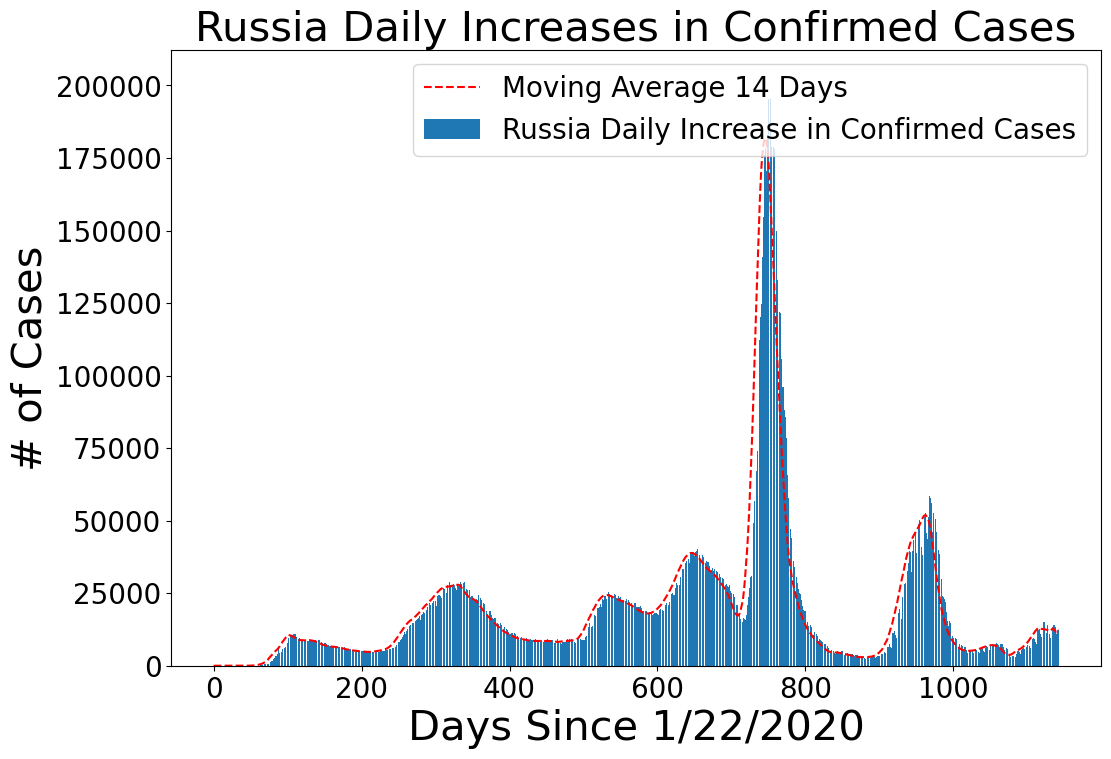

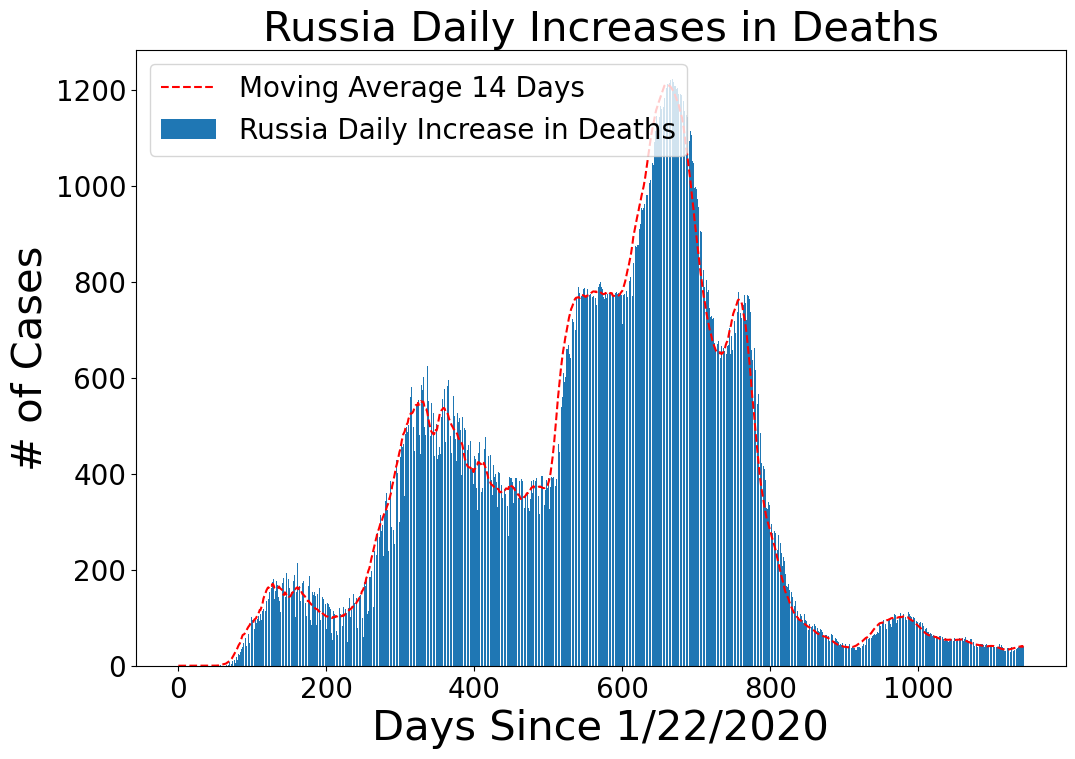

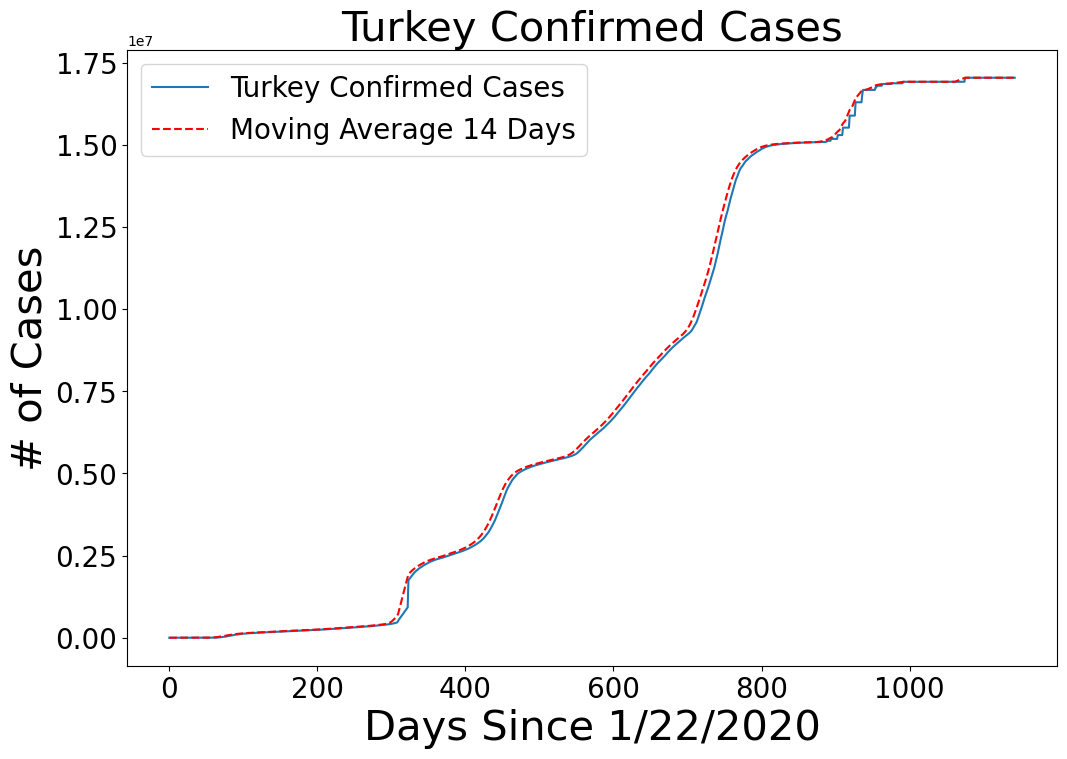

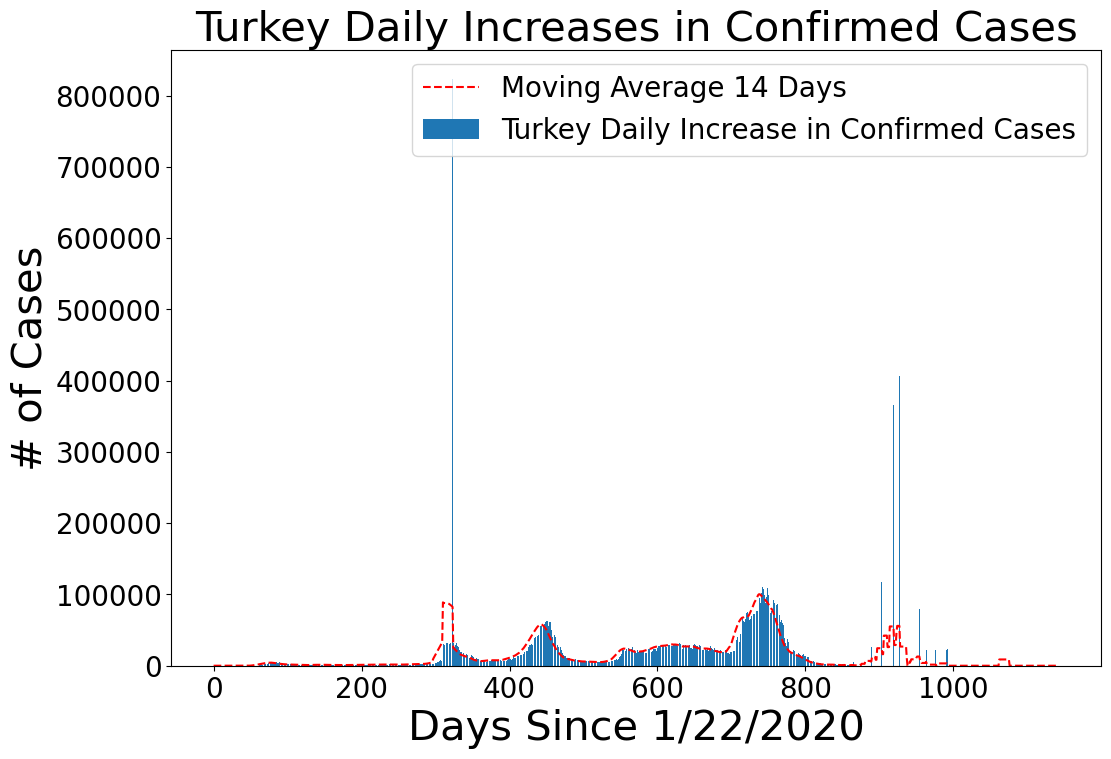

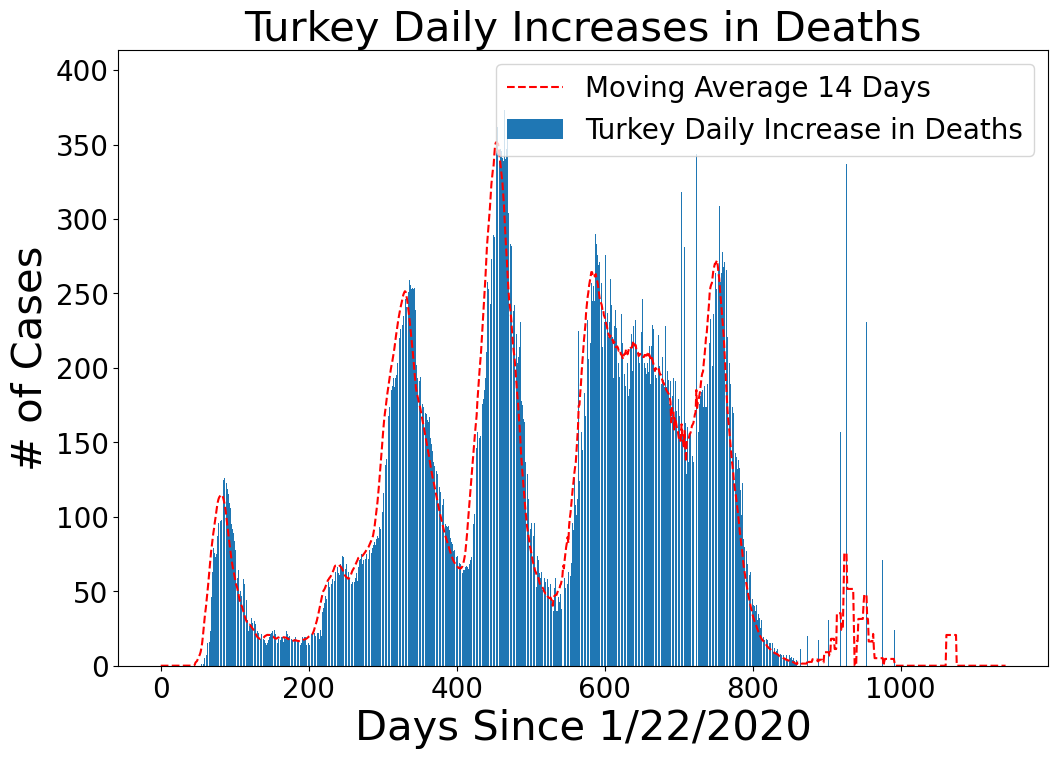

In [35]:
countries = ['US', 'China', 'India', 'Brazil', 'France', 'Germany', 'United Kingdom', 'Italy', 'Korea, South', 
             'Russia', 'Turkey']

for country in countries:
    country_visualizations(country, adjusted_dates, num_dates, con_df, dt_df, ck, dk, window=14)


In [36]:
#Predictions

In [37]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(12, 8))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

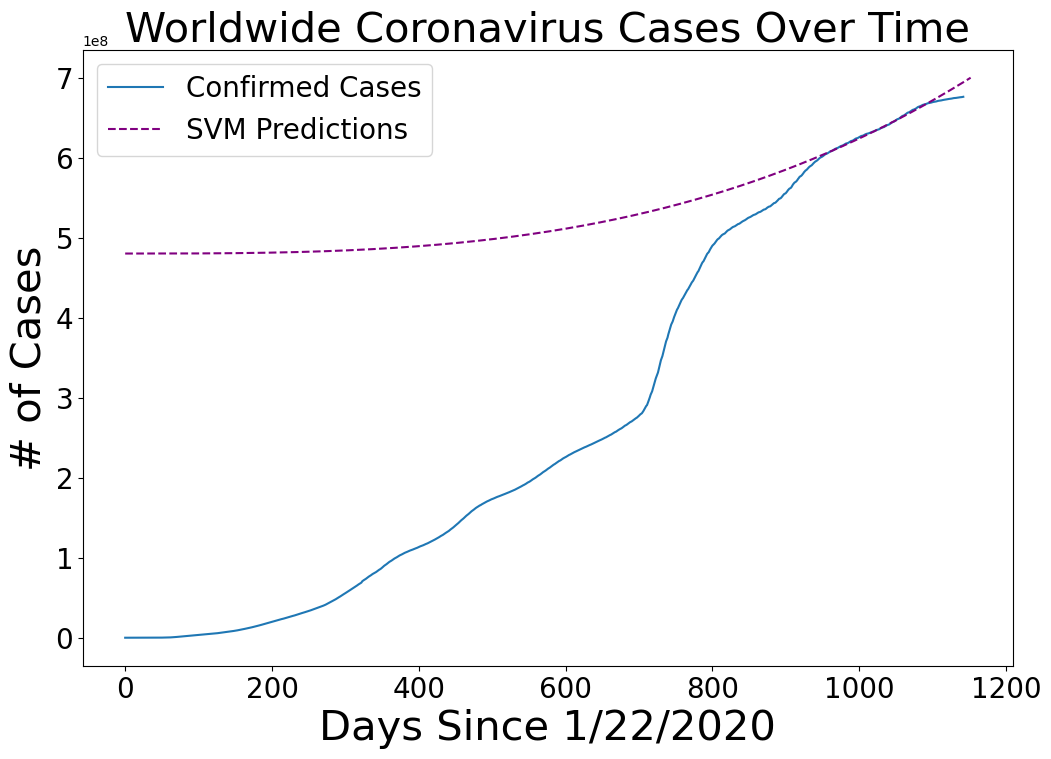

In [38]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

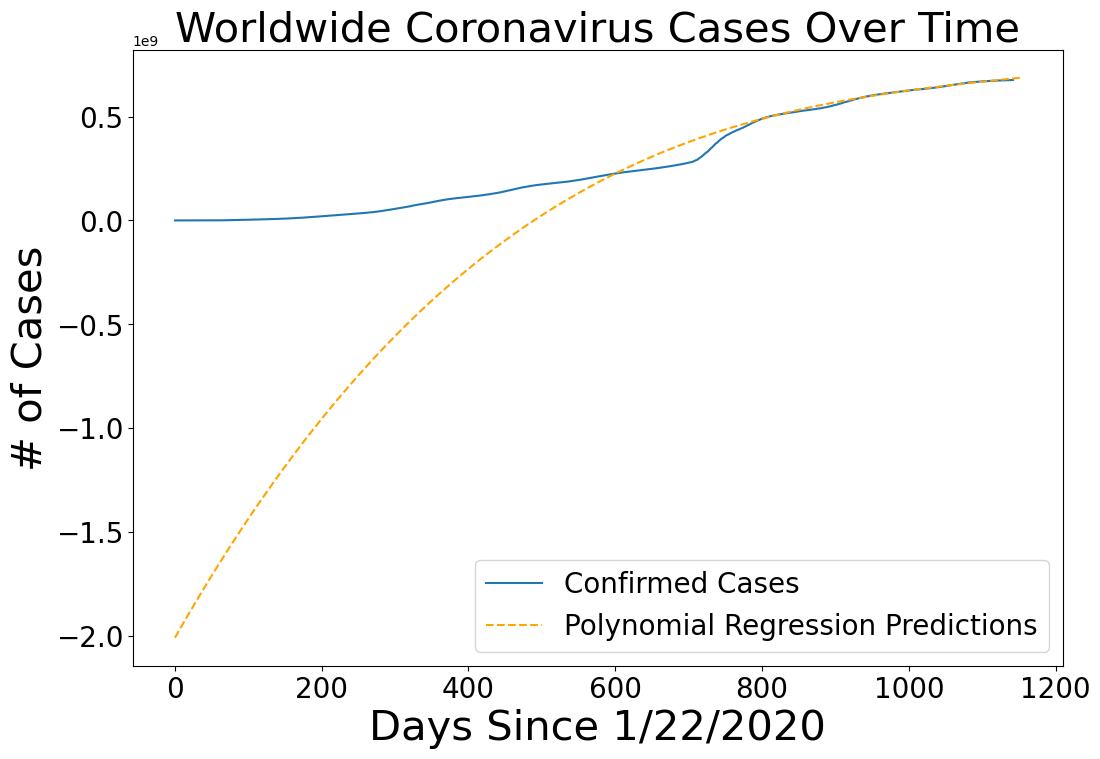

In [39]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

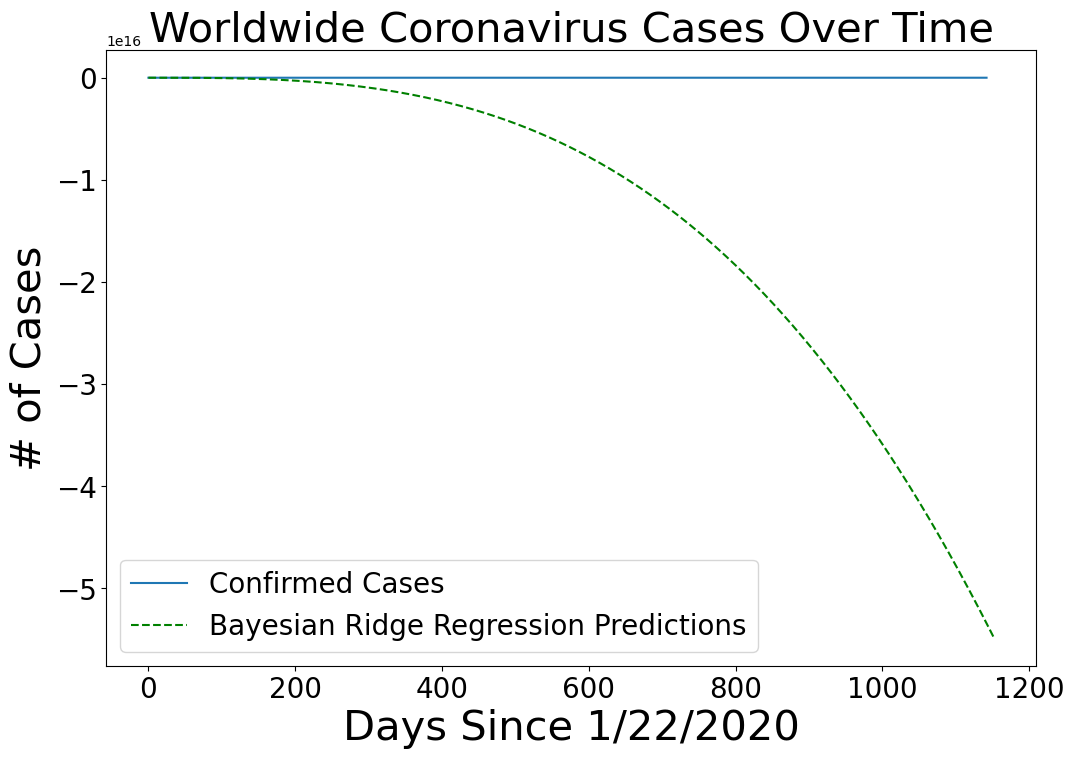

In [40]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [41]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

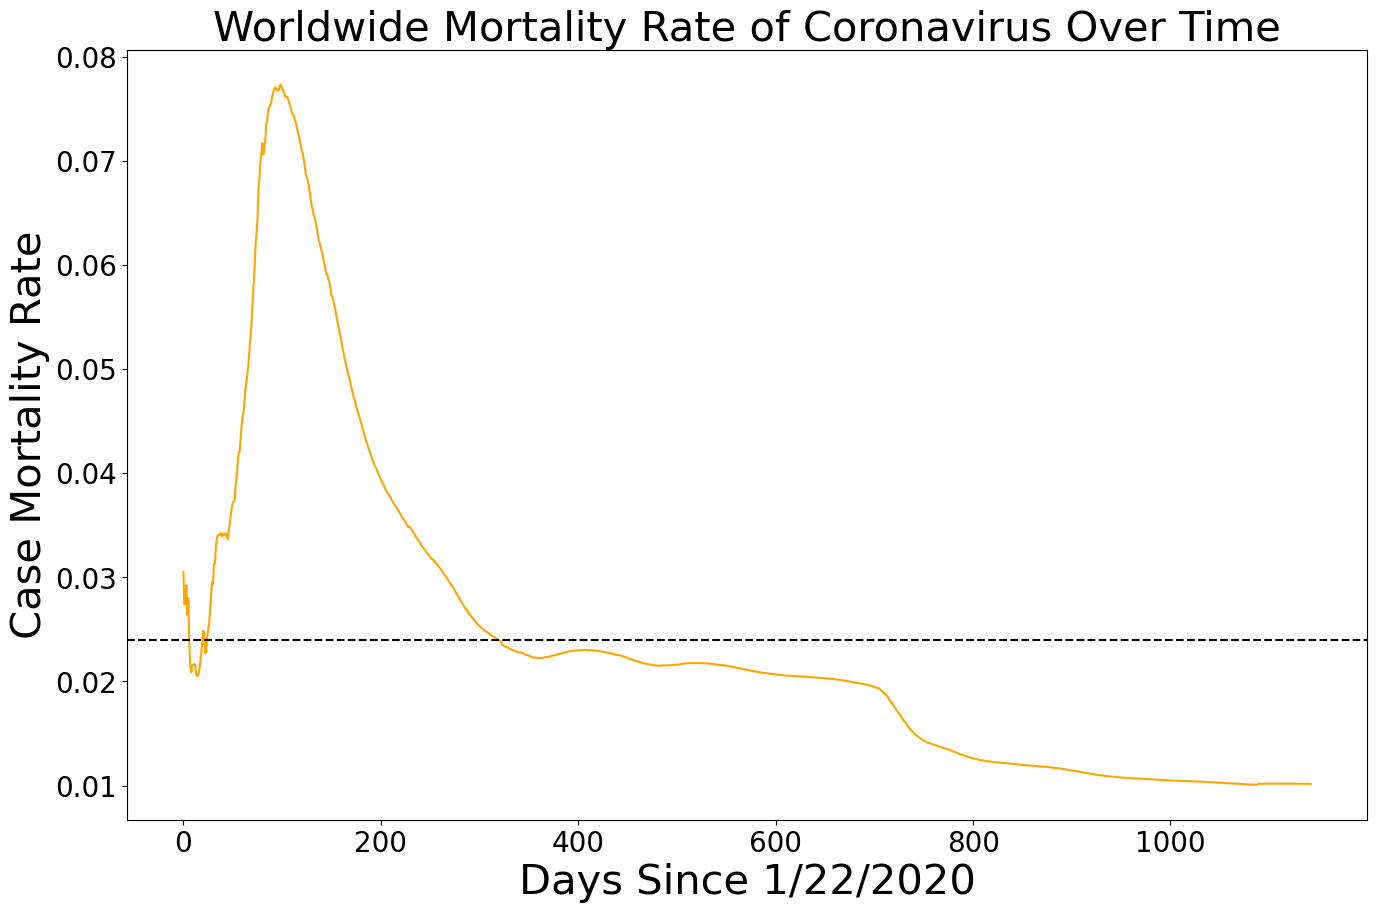

In [42]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [43]:
unique_countries =  list(new_data['Country_Region'].unique())

In [44]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = new_data[new_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = new_data[new_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(new_data[new_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_incidence_rate.append(new_data[new_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [45]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': [format(int(i), ',d') for i in country_confirmed_cases],
                          'Number of Deaths': [format(int(i), ',d') for i in country_death_cases], 
                          'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

In [46]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(new_data[new_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    # state_recovery_cases = []
#     state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = new_data[new_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = new_data[new_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(new_data[new_data['Province_State']==states[i]]['Deaths'].sum())
    #     state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
#         state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(new_data[new_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

In [47]:
uk_table = country_table('United Kingdom')
uk_table.style.background_gradient(cmap='Oranges')

In [48]:
us_table = country_table('US')
us_table.style.background_gradient(cmap='Oranges')

Bar Chart Visualisation for COVID- 19

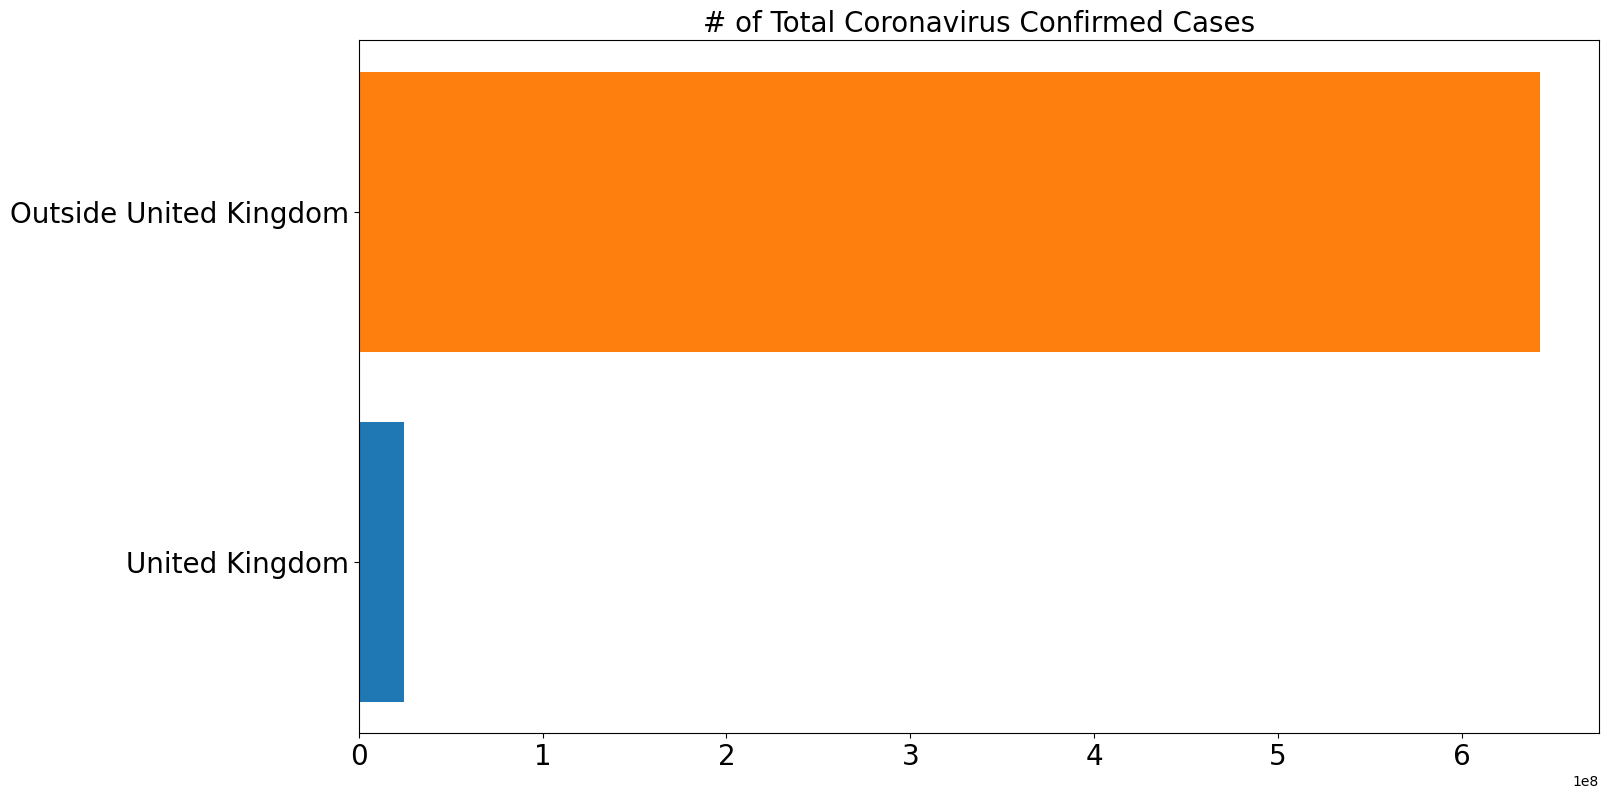

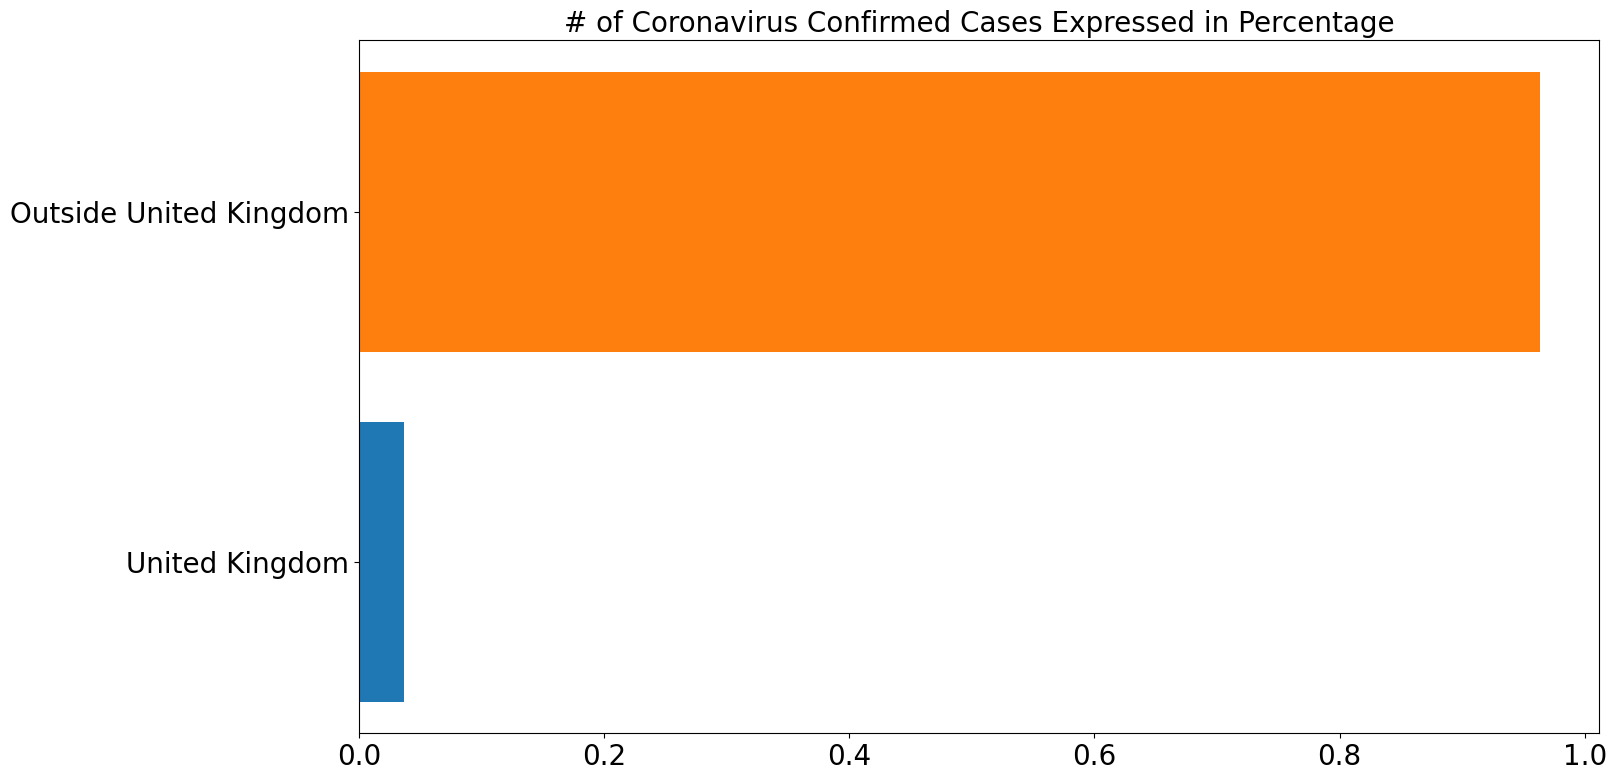

In [49]:
total_world_cases = np.sum(country_confirmed_cases)
uk_confirmed = new_data[new_data['Country_Region']=='United Kingdom']['Confirmed'].sum()
outside_uk_confirmed = total_world_cases - uk_confirmed

plt.figure(figsize=(16, 9))
plt.barh('United Kingdom', uk_confirmed)
plt.barh('Outside United Kingdom', outside_uk_confirmed)
plt.title('# of Total Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.barh('United Kingdom', uk_confirmed/total_world_cases)
plt.barh('Outside United Kingdom', outside_uk_confirmed/total_world_cases)
plt.title('# of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



In [50]:
print('Outside United Kingdom {} cases ({}%):'.format(outside_uk_confirmed, np.round((outside_uk_confirmed/total_world_cases)*100, 1)))
print('United Kingdom {} cases ({}%)'.format(uk_confirmed, np.round((uk_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside United Kingdom 642475733 cases (96.3%):
United Kingdom 24475895 cases (3.7%)
Total: 666951628 cases


In [51]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [52]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(19, 18))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

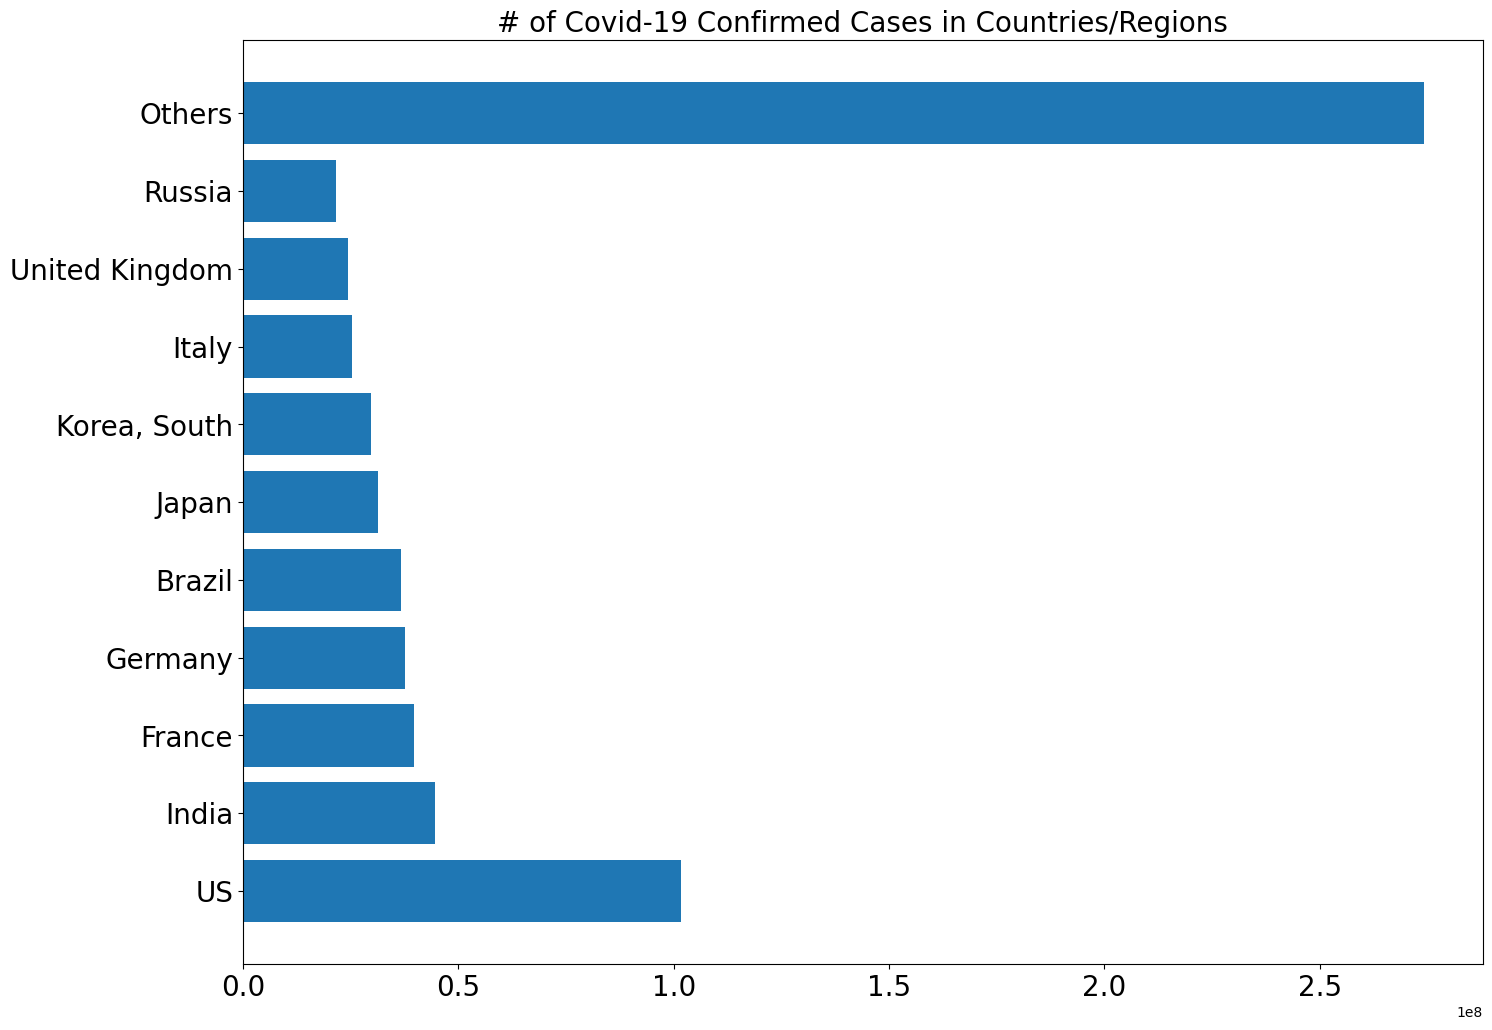

In [53]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')